In [20]:
import uproot 
import argparse
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm

f='1k_10MeV_e_down_1pcWbLS.root'
print('Opening file:',f)

with uproot.open(f) as file:
    
    meta_tree=file['meta']
    output_tree=file['output']
    
    pmt_type=meta_tree['pmtType'].array() # 0=8" 2=12" 3=10"
    hit_time=output_tree['mcPEHitTime'].array() # Time photon hits PMT cathode
    fe_time=output_tree['mcPEFrontEndTime'].array() # Time photon reaches front end electronics
    pmt_id=output_tree['mcPMTID'].array() 
    pmt_npe=output_tree['mcPMTNPE'].array()
    
    hit_time=ak.flatten(hit_time)
    fe_time=ak.flatten(fe_time)
    pmt_id=ak.flatten(pmt_id)
    pmt_npe=ak.flatten(pmt_npe)
    pmt_type=ak.flatten(pmt_type)
    
    print('********************')
    print('id has',len(pmt_id),'entries',pmt_id)
    print('npe has',len(pmt_npe),'entries',pmt_npe)
    print('type has',len(pmt_type),'entries',pmt_type)
    print('hit time has',len(hit_time),'entries',hit_time)
    print('fe time has',len(fe_time),'entries',fe_time)
    print('********************')
    
    counter=0
    r14688_hit_time=[]
    r14688_fe_time=[]
    r14688_deltat=[]
    r11780_hit_time=[]
    r11780_fe_time=[]
    r11780_deltat=[]
    r7081_hit_time=[]
    r7081_fe_time=[]
    r7081_deltat=[]
    
    # Loop through id of all pmt that were hit
    for i in tqdm(range(len(pmt_id))):
        # Loop through each hit
        for j in range(pmt_npe[i]):
            # See if it is a 
            if (pmt_type[pmt_id[i]]==0):
                #print('pmt',pmt_id[i],'is type',pmt_type[pmt_id[i]],'and saw',pmt_npe[i],'at hit time',hit_time[counter],'and fe time',fe_time[counter])
                r14688_hit_time.append(hit_time[counter])
                r14688_fe_time.append(fe_time[counter])
                r14688_deltat.append(fe_time[counter]-hit_time[counter])
            # See if it is a 12" 
            elif (pmt_type[pmt_id[i]]==2):
                #print('pmt',pmt_id[i],'is type',pmt_type[pmt_id[i]],'and saw',pmt_npe[i],'at hit time',hit_time[counter],'and fe time',fe_time[counter])
                r11780_hit_time.append(hit_time[counter])
                r11780_fe_time.append(fe_time[counter])
                r11780_deltat.append(fe_time[counter]-hit_time[counter])
            # See if it is a 10"
            elif (pmt_type[pmt_id[i]]==3):
                #print('pmt',pmt_id[i],'is type',pmt_type[pmt_id[i]],'and saw',pmt_npe[i],'at hit time',hit_time[counter],'and fe time',fe_time[counter])
                r7081_hit_time.append(hit_time[counter])
                r7081_fe_time.append(fe_time[counter])
                r7081_deltat.append(fe_time[counter]-hit_time[counter])
            counter+=1

Opening file: 1k_10MeV_e_down_1pcWbLS.root
********************
id has 220128 entries [103, 154, 18, 217, 189, 97, 199, 160, ..., 108, 223, 61, 128, 46, 89, 72, 189]
npe has 220128 entries [4, 4, 6, 8, 2, 2, 3, 6, 2, 2, 7, 3, 5, ..., 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1]
type has 241 entries [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, ..., 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
hit time has 774137 entries [5.48, 6.51, 7.71, 10.3, 7.87, 8.67, ..., 10.8, 8.04, 9.1, 12.3, 14.8, 19.5]
fe time has 774137 entries [5.55, 6.93, 7.81, 10.4, 8.98, 8.7, 14.6, ..., 10.7, 11, 9.15, 12.9, 15, 26]
********************


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 220128/220128 [00:32<00:00, 6826.78it/s]


Sum of probability is 1.000000000000001


(1e-06, 1)

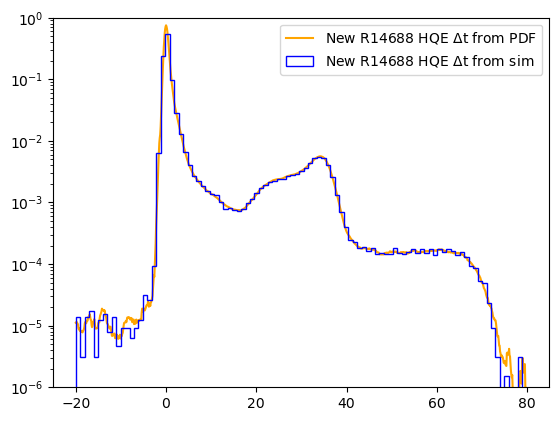

In [49]:
time_r14688=[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19.4, -19.3, -19.2, -19.1, -19.0, -18.9, -18.8, -18.7, -18.6, -18.5, -18.4, -18.3, -18.2, -18.1, -18.0, -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17.0, -16.9, -16.8, -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16.0, -15.9, -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1, -15.0, -14.9, -14.8, -14.7, -14.6, -14.5, -14.4, -14.3, -14.2, -14.1, -14.0, -13.9, -13.8, -13.7, -13.6, -13.5, -13.4, -13.3, -13.2, -13.1, -13.0, -12.9, -12.8, -12.7, -12.6, -12.5, -12.4, -12.3, -12.2, -12.1, -12.0, -11.9, -11.8, -11.7, -11.6, -11.5, -11.4, -11.3, -11.2, -11.1, -11.0, -10.9, -10.8, -10.7, -10.6, -10.5, -10.4, -10.3, -10.2, -10.1, -10.0, -9.9, -9.8, -9.7, -9.6, -9.5, -9.4, -9.3, -9.2, -9.1, -9.0, -8.9, -8.8, -8.7, -8.6, -8.5, -8.4, -8.3, -8.2, -8.1, -8.0, -7.9, -7.8, -7.7, -7.6, -7.5, -7.4, -7.3, -7.2, -7.1, -7.0, -6.9, -6.8, -6.7, -6.6, -6.5, -6.4, -6.3, -6.2, -6.1, -6.0, -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0, 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.0, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48.0, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53.0, 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54.0, 54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55.0, 55.1, 55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56.0, 56.1, 56.2, 56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57.0, 57.1, 57.2, 57.3, 57.4, 57.5, 57.6, 57.7, 57.8, 57.9, 58.0, 58.1, 58.2, 58.3, 58.4, 58.5, 58.6, 58.7, 58.8, 58.9, 59.0, 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59.8, 59.9, 60.0, 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8, 60.9, 61.0, 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9, 62.0, 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63.0, 63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64.0, 64.1, 64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65.0, 65.1, 65.2, 65.3, 65.4, 65.5, 65.6, 65.7, 65.8, 65.9, 66.0, 66.1, 66.2, 66.3, 66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67.0, 67.1, 67.2, 67.3, 67.4, 67.5, 67.6, 67.7, 67.8, 67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6, 68.7, 68.8, 68.9, 69.0, 69.1, 69.2, 69.3, 69.4, 69.5, 69.6, 69.7, 69.8, 69.9, 70.0, 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9, 71.0, 71.1, 71.2, 71.3, 71.4, 71.5, 71.6, 71.7, 71.8, 71.9, 72.0, 72.1, 72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73.0, 73.1, 73.2, 73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74.0, 74.1, 74.2, 74.3, 74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75.0, 75.1, 75.2, 75.3, 75.4, 75.5, 75.6, 75.7, 75.8, 75.9, 76.0, 76.1, 76.2, 76.3, 76.4, 76.5, 76.6, 76.7, 76.8, 76.9, 77.0, 77.1, 77.2, 77.3, 77.4, 77.5, 77.6, 77.7, 77.8, 77.9, 78.0, 78.1, 78.2, 78.3, 78.4, 78.5, 78.6, 78.7, 78.8, 78.9, 79.0, 79.1, 79.2, 79.3, 79.4, 79.5, 79.6, 79.7, 79.8, 79.9]
prob_r14688=[1.1144327233193849e-05, 1.0959767002260244e-05, 1.1488122496911807e-05, 1.1010439085073696e-05, 1.0844924166929868e-05, 1.0369562588789679e-05, 9.037162676553716e-06, 8.687069666826983e-06, 9.055479080077627e-06, 8.315257301335861e-06, 8.441543977885034e-06, 8.019335606469651e-06, 8.029577751032017e-06, 8.133378785221605e-06, 7.897655388496292e-06, 7.77643008221471e-06, 8.22381339628287e-06, 8.388717011758658e-06, 8.785508173331407e-06, 9.482009568803659e-06, 1.0987938991991602e-05, 1.1119201034143823e-05, 1.1748103508982774e-05, 1.0912141009174933e-05, 1.1663779878949656e-05, 1.2110730126772026e-05, 1.2015644770190887e-05, 1.3054915619003701e-05, 1.3856645583625488e-05, 1.413000403047355e-05, 1.4520835735292052e-05, 1.5295526104911323e-05, 1.3887570368512324e-05, 1.2475615877539717e-05, 1.2318908564691243e-05, 1.0228315022023073e-05, 9.459587518176562e-06, 9.918139045502902e-06, 1.145624261304343e-05, 1.1275936836098914e-05, 1.2081517930034913e-05, 1.2779187695184506e-05, 1.1193868973377688e-05, 9.601863351243468e-06, 8.964454749068162e-06, 9.068283881962193e-06, 9.015247508056714e-06, 9.095437850433231e-06, 9.173145948900767e-06, 9.602644208962519e-06, 1.1077661206224522e-05, 1.1256285910360908e-05, 1.1322189219933844e-05, 1.3267277709696475e-05, 1.4719972022560263e-05, 1.5245981679541546e-05, 1.6161227576783244e-05, 1.7178728683320627e-05, 1.890921365677092e-05, 1.7903389931773158e-05, 1.8059971134735034e-05, 1.7746336832507828e-05, 1.7973888534450937e-05, 1.7117978758729584e-05, 1.7635820640643804e-05, 1.6043913068569888e-05, 1.4285543106288608e-05, 1.4143013287708334e-05, 1.2591588094965951e-05, 1.0985987890630157e-05, 1.084349575524716e-05, 1.0420414544930233e-05, 1.0063929569909227e-05, 9.484586231696355e-06, 9.340958510082986e-06, 8.970571601920261e-06, 9.61786730171321e-06, 9.60258605627442e-06, 8.519324252452077e-06, 7.827829054769424e-06, 6.860435459135572e-06, 6.818241028519216e-06, 6.92963756767638e-06, 6.971771481514253e-06, 7.4066742440438466e-06, 7.269542312490217e-06, 7.4476880546823485e-06, 6.275459582861762e-06, 6.728292964039068e-06, 6.803611619145234e-06, 6.196132650606093e-06, 7.164207488068494e-06, 6.933170141381108e-06, 6.78472145134641e-06, 6.098984435687534e-06, 6.456839429617869e-06, 6.600229015879612e-06, 6.686935507013824e-06, 7.1532347509643254e-06, 6.184091878273914e-06, 6.700998408374782e-06, 6.730726775181737e-06, 6.790616558707309e-06, 7.4187272496916344e-06, 7.613739796718482e-06, 8.786303635344947e-06, 9.92515753840401e-06, 1.1071968931920218e-05, 1.1204695084435022e-05, 1.1201872836244765e-05, 1.1376007639756904e-05, 1.1952229958184605e-05, 1.1372584797205956e-05, 1.2532447603954807e-05, 1.3542864030081325e-05, 1.360020299024327e-05, 1.331011616144496e-05, 1.36617805218534e-05, 1.335515240721168e-05, 1.3530486265288505e-05, 1.2713653734753358e-05, 1.2523033369179275e-05, 1.2714461095359086e-05, 1.3336578426680584e-05, 1.3035654956332638e-05, 1.1392187525529685e-05, 1.1677601136232401e-05, 1.1683037636703539e-05, 1.2605744163933673e-05, 1.0622922683141996e-05, 1.1738964855931042e-05, 1.1801556607071736e-05, 1.0747196835815673e-05, 1.2072510603050195e-05, 1.257684425969953e-05, 1.1684909537579348e-05, 1.1223558654157137e-05, 1.2060162655459073e-05, 1.2147352491840562e-05, 1.1897386384354451e-05, 1.2146285514864765e-05, 1.2065034325827027e-05, 1.2521467383302798e-05, 1.2463158894656692e-05, 1.2761771044625358e-05, 1.258982964089413e-05, 1.6341032920922202e-05, 1.8959288260063862e-05, 1.8854012587544745e-05, 1.67028772212557e-05, 1.8730305043380745e-05, 1.8922284710214686e-05, 1.8034037140780804e-05, 1.7697714806842142e-05, 1.851038251511494e-05, 1.9502147069144658e-05, 2.0744129162513103e-05, 2.1563397460078044e-05, 2.1470552300231766e-05, 2.2047095104724756e-05, 2.4731824875595364e-05, 2.3065706798602373e-05, 2.02851987475007e-05, 2.1972171901600026e-05, 2.2853674377112912e-05, 2.0878892979838256e-05, 2.3493699727369244e-05, 2.417532904650085e-05, 2.5839942115990426e-05, 2.8022280223343055e-05, 3.059954383818188e-05, 3.9711159572611404e-05, 5.2477683324530104e-05, 6.66413984028494e-05, 6.204067590465628e-05, 9.582083731590211e-05, 0.00013812915712475648, 0.0002201814246806004, 0.00042625004235922884, 0.0006177211977211151, 0.0009540667952815272, 0.0016237014284615462, 0.0026003346327703337, 0.004198390712277286, 0.006450073273863008, 0.00919287376651613, 0.011148589097335489, 0.012671940635581788, 0.016948736908184898, 0.025268169712045208, 0.04103308252044566, 0.0657262322979495, 0.10413959839993668, 0.1584311535023438, 0.2366177739797469, 0.3335989688991775, 0.4458267103882094, 0.5596752466286042, 0.6538744589593507, 0.718152590464578, 0.7520507444851393, 0.7183253326716594, 0.6628851497336458, 0.5842459284790811, 0.494798749050402, 0.40532818743262156, 0.3250185422869829, 0.260033841829853, 0.2080555891959937, 0.16735885955273208, 0.13700407182098887, 0.1143996517445982, 0.09695665674821362, 0.08298636740522422, 0.07229163141679196, 0.06282156104503898, 0.05462760728512485, 0.048384967317418155, 0.04216607240907413, 0.03813606678918074, 0.034985563289459815, 0.032189050216825735, 0.02924633866143351, 0.027566604911089348, 0.02553343923025137, 0.023450186222138118, 0.02171465294694144, 0.019994244036384515, 0.018402451502320394, 0.016949721311171808, 0.015697532696848197, 0.014576764394809793, 0.0135205058710968, 0.012487902481612205, 0.011627746828469097, 0.010850323091342354, 0.010103313832705357, 0.009352062286963279, 0.008748053310763212, 0.008111854131775745, 0.00760879579207471, 0.007097450439013005, 0.006699024744282259, 0.006213628790467661, 0.005881534708725131, 0.005518052196712161, 0.005215522772246138, 0.004945224805988301, 0.004680651971371675, 0.004448776806273547, 0.004245183995947601, 0.004062390504938216, 0.003881342182228583, 0.0037355809695113094, 0.003587916852003688, 0.0034591916171977893, 0.003335350716577748, 0.003224440590763262, 0.003127154718288878, 0.0030278277113650917, 0.0029282341258913083, 0.0028356392256985107, 0.0027541043769824386, 0.0026808906454947757, 0.002619015456127587, 0.00254555105473625, 0.0024985185830537432, 0.0024356859772110815, 0.002373094694847524, 0.0023212262732076085, 0.0022661145220260344, 0.00221925560021634, 0.00217040966437204, 0.0021328812714390025, 0.002093002830283849, 0.0020595012287011653, 0.0020187389144272374, 0.0019763095758385794, 0.0019319489904986332, 0.001891509859913616, 0.0018557153137657323, 0.0018201939229904676, 0.0017976965943578445, 0.0017679651240903621, 0.0017395253302645883, 0.0017123989780785287, 0.0016823109763748822, 0.0016516772721449514, 0.0016236032616311856, 0.001592924348477693, 0.0015630242083143826, 0.0015475635708010658, 0.0015280924917018654, 0.0015135906077522723, 0.001491782656682093, 0.001475082091614706, 0.0014525537827791677, 0.001431032325470662, 0.0014063810719157914, 0.0013883143482866429, 0.0013776256150019592, 0.0013669015681712516, 0.001355518464320961, 0.0013404685695716661, 0.0013306938625036538, 0.0013165890520845987, 0.0012939573178737478, 0.001275750612553786, 0.001258988587159497, 0.0012453888105219326, 0.0012279177073506846, 0.001212552805285178, 0.001200868760350576, 0.0011874275190831211, 0.0011702544778268839, 0.0011483466110716067, 0.0011273723868273368, 0.001110556070543959, 0.0010973613164462334, 0.0010788060151658676, 0.001063135669303487, 0.0010429374613979536, 0.0010267039470541323, 0.0010117334403718467, 0.0009940162815376436, 0.0009783598036008745, 0.0009668026142962812, 0.0009470159071472943, 0.0009368241997310432, 0.0009262498268023219, 0.0009210567279734932, 0.0009118896376568643, 0.000898751625216979, 0.0008821657332798858, 0.0008722359531649846, 0.0008674769892374499, 0.0008607858820949526, 0.0008525906791436616, 0.0008428716286049387, 0.0008367169810121047, 0.0008333448814764376, 0.0008217276824595053, 0.0008157221003790297, 0.0008084226910938256, 0.0008009401531520935, 0.0007895242348717331, 0.0007833970741789035, 0.0007823302855710188, 0.0007791703117425699, 0.0007738509945418088, 0.0007681977715835997, 0.0007654610159820815, 0.0007655857890051022, 0.0007631068704476203, 0.0007597941796294752, 0.000754201410854801, 0.0007521643363200863, 0.0007504631822462382, 0.0007437555189017427, 0.0007443535944613456, 0.0007503980296961118, 0.0007536046505246879, 0.000749931089351343, 0.0007485045054699258, 0.0007465835778200729, 0.0007461565767116742, 0.0007486414997977705, 0.0007459893316571067, 0.0007531416445300351, 0.0007617717359998554, 0.0007716844472488727, 0.000780975915800232, 0.0007943566928195084, 0.0008062620331158673, 0.0008161454597940112, 0.000820909472447792, 0.0008291885298812343, 0.0008468162375717172, 0.0008676536766967434, 0.000888445734865917, 0.0009046136115182797, 0.0009196954302845111, 0.0009420381458936837, 0.000960703644158594, 0.0009783293710376672, 0.000995952129586003, 0.0010165845256905578, 0.001034821816710026, 0.0010599703835194956, 0.0010767155857811892, 0.0010970341775119335, 0.0011182938951346908, 0.0011413674283555896, 0.0011655078829588183, 0.001186583930737431, 0.001211686691456508, 0.0012403767682633653, 0.001271719716985659, 0.0012933012982633213, 0.0013194461807276895, 0.0013464043380208687, 0.0013762464452366607, 0.0014070914795009744, 0.001434141726242951, 0.00147043017441971, 0.0015050282258141467, 0.0015391776826192674, 0.0015718081796005754, 0.0015992737661116494, 0.0016347804937520763, 0.0016639219414118062, 0.0016942902841069246, 0.001715864007996763, 0.0017487964173346856, 0.0017806493936615895, 0.0018081444858763242, 0.0018227164455618123, 0.0018417758134942656, 0.0018672754420157218, 0.0018931851200560865, 0.0019181010946105346, 0.0019366033681178338, 0.001955033656813753, 0.001979835016838766, 0.001996982203644561, 0.002023362105924002, 0.002049636443742628, 0.002074916469944426, 0.0020949264071473033, 0.0021167441503665615, 0.0021350506284446243, 0.002163544451400637, 0.002193382932987499, 0.0022108615541502085, 0.002226026897223393, 0.002245085761108334, 0.002269266887252203, 0.0022886273053780463, 0.0023009765307031955, 0.0023218074627302026, 0.0023352081168450116, 0.0023388061847434724, 0.0023424529197219085, 0.002353237400849425, 0.0023627196241085857, 0.002370077161952418, 0.002370766335295434, 0.0023705228482172004, 0.0023769916733768124, 0.0023921603655071067, 0.002391987650907079, 0.0023975907048355235, 0.002403181581462665, 0.0024079778608902037, 0.0024170996159350133, 0.00241881894613777, 0.002429628619186137, 0.00245215989098806, 0.0024634225253078353, 0.0024694048564525258, 0.0024948160422541697, 0.002522516967661019, 0.0025406328524678, 0.00256068196197578, 0.0025744916485306263, 0.002601358497497148, 0.002612151090438166, 0.0026294227354475763, 0.002645041809795993, 0.0026640640779348884, 0.0026826965566996938, 0.0027069806240969806, 0.0027143755833014937, 0.0027280531795912453, 0.0027449476252591875, 0.002745477260680273, 0.002760911222780579, 0.002774922252127659, 0.0027882839012036706, 0.00279538687412394, 0.002804852346148481, 0.0028210233951113037, 0.0028338537189541587, 0.0028453549681541567, 0.002850701223975205, 0.0028648410369180835, 0.0028723990348066505, 0.0028873940715262725, 0.0029129521230349654, 0.002934309714690789, 0.002962509354890216, 0.002971927729491675, 0.0029886799569287317, 0.0030171279320168713, 0.0030428487099566246, 0.0030740704036791217, 0.00310324267055036, 0.0031285965569649234, 0.003173806203370929, 0.0032094725196275702, 0.0032486119926114243, 0.0032865472735198816, 0.0033256297403546895, 0.0033490083126525767, 0.003389041986130826, 0.0034331214661688643, 0.003480718717545488, 0.0035305561589343186, 0.003567617379342534, 0.0036183870762225598, 0.003671047749634425, 0.0037229510060022577, 0.0037780294549937155, 0.003834872515034146, 0.0038943711377097496, 0.003961162471550299, 0.00403303425289908, 0.004100644612574087, 0.004191873796239375, 0.004261344873024191, 0.004336788979607458, 0.004419609637683699, 0.00449963213316718, 0.004582378019013465, 0.0046624923134119915, 0.004734788089462109, 0.004821903263060365, 0.004913152564828107, 0.004978838295759001, 0.005064386976959056, 0.005124580178771816, 0.005190625755701268, 0.005262579938839848, 0.00531283981840925, 0.005372261324521064, 0.005428868062128403, 0.005468019542045931, 0.005514150552324867, 0.005556611244844012, 0.0055961160623271096, 0.005609076572716606, 0.005614121838369308, 0.005611241166062301, 0.005614732669664956, 0.005587811017544575, 0.005571539618291562, 0.005534129660425989, 0.005486472044681895, 0.0054273732963742395, 0.005358710962446138, 0.005273682996320872, 0.005183012395754195, 0.005075221876390266, 0.0049536334881395945, 0.004826328300005692, 0.004707429165814142, 0.004567536927820723, 0.004418524617412578, 0.004263105143382988, 0.004111636786109895, 0.003949103285831735, 0.0037846155545323192, 0.00361750529847856, 0.003460092410082308, 0.0032947501360731245, 0.003126044901197592, 0.0029756152387134076, 0.0028198780030555515, 0.0026686009626385775, 0.002509066843529267, 0.0023601682413314775, 0.0022237595910357864, 0.0020939913660005145, 0.001967787261959608, 0.0018381240158629104, 0.0017207122662715052, 0.0016109840642261127, 0.0015085514123938817, 0.0014069234612935112, 0.0013114208010594328, 0.001225169921851552, 0.0011365071498450605, 0.0010552731470765899, 0.0009814902180836356, 0.0009158555421657888, 0.0008538999977428371, 0.0007957615484735299, 0.0007383453110130785, 0.0006864412316121976, 0.0006422781111802163, 0.0005980501519436105, 0.00055668633042879, 0.0005171744072190784, 0.0004836849770344118, 0.00045621579079320663, 0.0004315903063897875, 0.0004054686025810508, 0.0003840049602656446, 0.00036437773738828345, 0.00034976524673713353, 0.00033608392259816517, 0.0003234823295555477, 0.00031423705462158664, 0.0003049518813900137, 0.0002970446666946267, 0.00028917149855283515, 0.0002849293148878358, 0.00027878712809357564, 0.0002686334280949194, 0.0002620459775710228, 0.0002544070873067016, 0.0002494275139531709, 0.0002449504438744849, 0.00024032969082385706, 0.00023452127913035028, 0.0002293610943001911, 0.00022687325274817826, 0.00021992655545958277, 0.00021450052891058193, 0.00021235617050944705, 0.00020942182400990407, 0.00020468055422689905, 0.00020116253872422727, 0.0001990113140069781, 0.0001947769563544608, 0.000193266436194115, 0.00019135235162674537, 0.00018922650983391455, 0.00018765173151384524, 0.0001855466039906101, 0.00018533103359006923, 0.0001802157222562531, 0.000178475948616063, 0.0001791799850566418, 0.00017821614012226254, 0.00017944081388823112, 0.0001797004466724035, 0.00018007259020251217, 0.00018115731669104767, 0.00018350279888841174, 0.00018123177242382018, 0.00017975605810220942, 0.00018066836994760094, 0.00017898629867019799, 0.00017807754198458222, 0.00017543596506781412, 0.00017628171089295702, 0.00017672084743847608, 0.00017639701165101363, 0.00017766338566203854, 0.00017952488699989492, 0.00017681535581519361, 0.00017698678268119255, 0.00017499585407431062, 0.00017240516850122365, 0.00017107534143334495, 0.00017113178423575648, 0.00017147760480098906, 0.00017094924130378324, 0.0001740436406897519, 0.0001735364891684093, 0.00017072585850281153, 0.0001700324133760481, 0.00016974853053650497, 0.00016507215639699214, 0.00015963774269803598, 0.00016083833369986717, 0.00015761587326949806, 0.0001560120108110612, 0.00015458595654519423, 0.0001545827313974517, 0.0001541241546965213, 0.00014988993147145623, 0.00014706097988740745, 0.00014316535763796422, 0.0001440617686169997, 0.0001459296011838563, 0.00014423632517814383, 0.00014287621378897787, 0.000143945698676746, 0.0001437793009762678, 0.00014408607023846975, 0.00014331653106590934, 0.0001475311052152411, 0.00015023931302544469, 0.00015053436187716682, 0.00015214434479708146, 0.00015086553382661957, 0.00015216351263872867, 0.00015390229290972906, 0.00015335876014442603, 0.00015136975525548055, 0.0001507882517014979, 0.0001536146692804952, 0.00015516131961275606, 0.00015665970403483297, 0.00016126247966299134, 0.00015940622719437823, 0.00015942776155135596, 0.0001552856434517097, 0.00015713916293914868, 0.00015794058416674226, 0.00016061807713646498, 0.0001581223456393515, 0.0001574131405947336, 0.0001573260569893161, 0.0001587636553662956, 0.00016031734381395535, 0.00015754890847839172, 0.0001585632604144647, 0.00015899471085869672, 0.00015480230082743574, 0.0001519627764786255, 0.0001511549385477487, 0.0001520865111465686, 0.00015308152695297212, 0.00015123722158346826, 0.00015050229397338692, 0.00015019493984058955, 0.00015370190594609883, 0.0001560610701296568, 0.00015640101627127702, 0.00015500014872143892, 0.00015538148157959292, 0.00015528541513652386, 0.00015726653817260144, 0.00015485440788966768, 0.0001562111484287324, 0.00015463838717702676, 0.00015299455651679426, 0.00015335302133597631, 0.0001554225626287317, 0.00015603074866537233, 0.00015504324594912687, 0.00015214068851395472, 0.00014873085320309408, 0.00014836270306205774, 0.00015237129572080472, 0.0001533910353868689, 0.0001557012800759527, 0.00015353264391477828, 0.00015649231226629178, 0.00015919108329343423, 0.00016199270260167935, 0.00016360847105366296, 0.00016430746636057698, 0.00016305130333788483, 0.00016283395847096382, 0.0001632800650510014, 0.0001671620648156306, 0.00016855163593066963, 0.00016764130150460495, 0.0001659846703871653, 0.00016621586995153525, 0.00016304030731347332, 0.00016232409503985786, 0.00015898776593197456, 0.00015734994931392742, 0.00015512230376732282, 0.0001560943272299143, 0.00015685965699926163, 0.0001563382118386309, 0.00015685680319816884, 0.000157590370870775, 0.0001568169959493588, 0.00015472665717915698, 0.00015650884043195, 0.00015782093274999302, 0.00015669365666850962, 0.00015677901234035762, 0.0001559574402458586, 0.00015960741777580557, 0.00016020794963379488, 0.0001614251222487994, 0.0001612033025391671, 0.0001600590548836503, 0.00016291156309878032, 0.0001621878136520534, 0.0001641650576618243, 0.00016088282366229372, 0.00016213915068213647, 0.000160805895259358, 0.00016213397189701506, 0.00016201280429481438, 0.0001629694981424867, 0.00016282184805463648, 0.00016424584938310377, 0.000164147281495098, 0.0001627280325732157, 0.00016399273137433413, 0.00016349801811718422, 0.00016348253785305574, 0.00016395687640400136, 0.00016411516843064188, 0.00016601932372281448, 0.00016670673398005504, 0.00016665118682366166, 0.0001645105295937248, 0.00016384605375051667, 0.00016445676426230524, 0.00016903573382056765, 0.00016811236121398306, 0.0001679973415350087, 0.00017053698784764176, 0.00016889056553663433, 0.00017353682651837928, 0.0001718196070786453, 0.00017143917002733293, 0.00016933336588205274, 0.0001705430237175396, 0.0001730341171943681, 0.0001718646557343943, 0.00017061407556967243, 0.0001707950528008926, 0.0001696870554254822, 0.00016527981334754237, 0.00016477485528688062, 0.00016410990261838011, 0.0001622885762437142, 0.00016067395008444182, 0.00015779086497945286, 0.00015994500321349359, 0.00016182001113596928, 0.00015953493849908289, 0.0001572107081472771, 0.00015524162546730203, 0.0001570122150438598, 0.0001567385532884759, 0.00015683611641503214, 0.0001555154259729587, 0.00015645779399843572, 0.00015437229626009337, 0.00015517959074089218, 0.00015461602074702457, 0.00015599745291146463, 0.0001539231412448643, 0.00015139145159608438, 0.0001502260071697453, 0.00014938148331196133, 0.0001518590326342885, 0.00015214561743613078, 0.00015300663429776846, 0.00015153019922323682, 0.00015116383453036192, 0.0001504539484210382, 0.00015044178270323097, 0.00015140285103877724, 0.0001519197589760584, 0.00015159997316022798, 0.0001490525337036409, 0.00014878837904786876, 0.0001465745639952306, 0.00014629496852634926, 0.00015182050737126088, 0.00014826664204811764, 0.00014536429414245533, 0.00014163931833367901, 0.00014195829136494787, 0.00014121450903857913, 0.0001392218079995991, 0.0001366110314297334, 0.0001332489773851729, 0.00012997587779633348, 0.00012859578499050062, 0.00012919574557386756, 0.00012731155691213253, 0.00012578533805354932, 0.00012213047181486433, 0.00011557073196789713, 0.00011488912613927232, 0.00011362039502704857, 0.00011252846217997638, 0.00011048928655939165, 0.00010810907926466297, 0.00010824928944413069, 0.00010472982062138144, 0.0001036113829611978, 0.00010179637677445258, 9.933466206445652e-05, 9.585582809551696e-05, 9.505744266429641e-05, 9.254984256332107e-05, 8.961784861039007e-05, 8.895597779190082e-05, 8.734483570222815e-05, 8.535510910309738e-05, 8.220822881494132e-05, 7.934500158117179e-05, 7.855330922370902e-05, 7.540213744873354e-05, 7.219297125302496e-05, 6.969444949802883e-05, 6.738064454276528e-05, 6.584540745749387e-05, 6.508100469333075e-05, 6.212023499443836e-05, 6.068724073276165e-05, 5.727275011812934e-05, 5.3558872271894754e-05, 5.0879751869207185e-05, 4.965822533417624e-05, 4.882411910363552e-05, 4.7352825819507026e-05, 4.42170019035676e-05, 4.098181722327934e-05, 3.996665498878605e-05, 3.851266311646705e-05, 3.70222273279634e-05, 3.506254412646893e-05, 3.186725655334301e-05, 3.0066821877072438e-05, 2.8583861929972973e-05, 2.895627696235639e-05, 2.7758405767113907e-05, 2.4781170596625004e-05, 2.2293589551488006e-05, 2.1538869887466414e-05, 2.142792569846001e-05, 2.0922781586931406e-05, 2.1224488041123833e-05, 1.9416337225180633e-05, 1.910614271639577e-05, 1.731347190101684e-05, 1.6449182372187445e-05, 1.4658355584180286e-05, 1.3677875591552445e-05, 1.3121944443709679e-05, 1.3130939361258546e-05, 1.2448634644657492e-05, 1.2184207533383484e-05, 1.2185424262747283e-05, 1.0872190345398521e-05, 9.31950493849071e-06, 8.053284924825494e-06, 6.780153186468945e-06, 6.712877096229578e-06, 6.824446231542651e-06, 5.641291839371301e-06, 4.76990508686811e-06, 4.733148855141164e-06, 3.822241613877016e-06, 3.557840561214591e-06, 3.1535115571159836e-06, 3.202295767005467e-06, 3.285806635658114e-06, 3.0867999974646e-06, 3.064937456068795e-06, 2.819077294177226e-06, 2.494034258312806e-06, 2.4674071107126504e-06, 2.4577912803083333e-06, 2.6666694742270584e-06, 2.3634919835487775e-06, 2.254470057223544e-06, 2.218902165932386e-06, 3.5902282949216657e-06, 3.6589417507911752e-06, 3.6116596739093867e-06, 3.4063433539988292e-06, 3.577002767652972e-06, 4.211675556826252e-06, 3.307076142508975e-06, 3.1882526367055934e-06, 2.4705573233341786e-06, 1.8788239047286686e-06, 1.5902637948470793e-06, 1.4519952516026354e-06, 1.583123975583051e-06, 9.131285810715073e-07, 7.889257922267908e-07, 3.829110007057107e-07, 2.6892633956420014e-07, 2.6137046739681245e-07, 2.786576919642552e-07, 1.593543266898049e-07, 9.452127461104857e-08, 1.007659205407821e-07, 1.007659205407821e-07, 1.007659205407821e-07, 7.239021168169321e-08, 7.239021168169321e-08, 5.527976551768116e-07, 5.527976551768116e-07, 1.2075120211652732e-06, 1.1902247965978308e-06, 1.8449391625862934e-06, 1.7960808214017768e-06, 1.7960808214017768e-06, 1.141366455413314e-06, 2.4507951873902386e-06, 2.9845536318637905e-06, 1.7183890561215304e-06, 2.3731034221099924e-06, 2.3731034221099924e-06, 2.3731034221099924e-06, 2.3731034221099924e-06, 9.879049784744538e-07, 9.879049784744538e-07, 3.3319061248599196e-07, 3.3319061248599196e-07]

for i in range(len(prob_r14688)):
    prob_r14688[i]=prob_r14688[i]
    
sum=0
for i in prob_r14688:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)

plt.plot(time_r14688,prob_r14688,label='New R14688 HQE $\Delta$t from PDF',color='orange')
plt.hist(r14688_deltat,bins=100,density=True,histtype='step',color='blue',label='New R14688 HQE $\Delta$t from sim');
plt.yscale('log')
plt.legend()
plt.ylim(1e-6,1)

Sum of probability is 0.9999999999999996


(1e-06, 1)

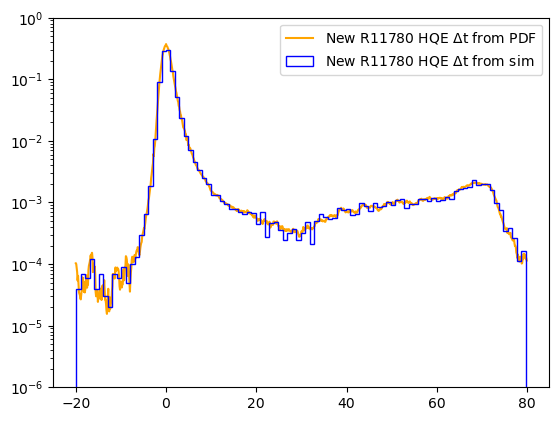

In [50]:
time_r11780=[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19.4, -19.3, -19.2, -19.1, -19.0, -18.9, -18.8, -18.7, -18.6, -18.5, -18.4, -18.3, -18.2, -18.1, -18.0, -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17.0, -16.9, -16.8, -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16.0, -15.9, -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1, -15.0, -14.9, -14.8, -14.7, -14.6, -14.5, -14.4, -14.3, -14.2, -14.1, -14.0, -13.9, -13.8, -13.7, -13.6, -13.5, -13.4, -13.3, -13.2, -13.1, -13.0, -12.9, -12.8, -12.7, -12.6, -12.5, -12.4, -12.3, -12.2, -12.1, -12.0, -11.9, -11.8, -11.7, -11.6, -11.5, -11.4, -11.3, -11.2, -11.1, -11.0, -10.9, -10.8, -10.7, -10.6, -10.5, -10.4, -10.3, -10.2, -10.1, -10.0, -9.9, -9.8, -9.7, -9.6, -9.5, -9.4, -9.3, -9.2, -9.1, -9.0, -8.9, -8.8, -8.7, -8.6, -8.5, -8.4, -8.3, -8.2, -8.1, -8.0, -7.9, -7.8, -7.7, -7.6, -7.5, -7.4, -7.3, -7.2, -7.1, -7.0, -6.9, -6.8, -6.7, -6.6, -6.5, -6.4, -6.3, -6.2, -6.1, -6.0, -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0, 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.0, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48.0, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53.0, 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54.0, 54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55.0, 55.1, 55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56.0, 56.1, 56.2, 56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57.0, 57.1, 57.2, 57.3, 57.4, 57.5, 57.6, 57.7, 57.8, 57.9, 58.0, 58.1, 58.2, 58.3, 58.4, 58.5, 58.6, 58.7, 58.8, 58.9, 59.0, 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59.8, 59.9, 60.0, 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8, 60.9, 61.0, 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9, 62.0, 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63.0, 63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64.0, 64.1, 64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65.0, 65.1, 65.2, 65.3, 65.4, 65.5, 65.6, 65.7, 65.8, 65.9, 66.0, 66.1, 66.2, 66.3, 66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67.0, 67.1, 67.2, 67.3, 67.4, 67.5, 67.6, 67.7, 67.8, 67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6, 68.7, 68.8, 68.9, 69.0, 69.1, 69.2, 69.3, 69.4, 69.5, 69.6, 69.7, 69.8, 69.9, 70.0, 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9, 71.0, 71.1, 71.2, 71.3, 71.4, 71.5, 71.6, 71.7, 71.8, 71.9, 72.0, 72.1, 72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73.0, 73.1, 73.2, 73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74.0, 74.1, 74.2, 74.3, 74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75.0, 75.1, 75.2, 75.3, 75.4, 75.5, 75.6, 75.7, 75.8, 75.9, 76.0, 76.1, 76.2, 76.3, 76.4, 76.5, 76.6, 76.7, 76.8, 76.9, 77.0, 77.1, 77.2, 77.3, 77.4, 77.5, 77.6, 77.7, 77.8, 77.9, 78.0, 78.1, 78.2, 78.3, 78.4, 78.5, 78.6, 78.7, 78.8, 78.9, 79.0, 79.1, 79.2, 79.3, 79.4, 79.5, 79.6, 79.7, 79.8, 79.9]
prob_r11780=[0.00010295684447093266, 0.00010005440907763478, 8.653279900797218e-05, 7.441897347036201e-05, 5.404665894004628e-05, 6.443874493762291e-05, 4.903564204108376e-05, 3.513219123160036e-05, 3.2940050092202684e-05, 3.1786166611446445e-05, 2.799724330627921e-05, 2.6679249855892208e-05, 3.214499640550818e-05, 3.7158005132089116e-05, 4.328261609614683e-05, 6.0948608889979317e-05, 4.901672621496898e-05, 5.259172940952891e-05, 3.534402348175e-05, 4.887356100583355e-05, 3.461878860577179e-05, 3.8535818780587035e-05, 5.048735214742629e-05, 6.581855447611568e-05, 6.527286533518375e-05, 4.135928510389268e-05, 5.2537486155016765e-05, 4.607627216414182e-05, 7.918031230549502e-05, 9.343948056346836e-05, 0.00010096191420026335, 0.0001085266656776778, 0.00012368688979669538, 0.00013893928741376342, 0.0001238078864865945, 0.00014620893647886743, 0.00015265596031069752, 0.00012712003088322948, 7.39703860799284e-05, 9.150034846495906e-05, 0.00010153859918065232, 8.442902780685053e-05, 9.110365337774271e-05, 6.838232565119878e-05, 3.52636636704824e-05, 2.9951818675254902e-05, 3.193153465779146e-05, 3.73767368831298e-05, 3.2399160960532655e-05, 2.434458078862102e-05, 2.993306609454959e-05, 3.0516725273758576e-05, 2.7660795172437762e-05, 3.7582013196167236e-05, 2.810617084464771e-05, 4.0005459360100895e-05, 3.273368941444422e-05, 2.6111487512449295e-05, 3.0112396276916577e-05, 4.464956188741604e-05, 3.7511206281909754e-05, 4.532258252268668e-05, 4.214317446714249e-05, 5.4814886827922635e-05, 3.9264329414057e-05, 2.633936394319557e-05, 2.6172852395624543e-05, 2.257465984805851e-05, 1.7538160199634693e-05, 1.5549694868391562e-05, 2.099911222053149e-05, 3.136320975457049e-05, 3.973297377115302e-05, 2.16706088128901e-05, 1.705956165363978e-05, 2.9057702234944985e-05, 1.854312119616596e-05, 2.0693259276812066e-05, 2.358072171409322e-05, 2.4374881319121547e-05, 3.590839195423905e-05, 4.373947471046202e-05, 6.91555743677499e-05, 6.820081189698117e-05, 6.403755228441643e-05, 6.8982384763051e-05, 5.831854724014645e-05, 7.483548817884236e-05, 8.818888391030857e-05, 7.568565459258945e-05, 7.95277500357574e-05, 8.24163123663856e-05, 8.768824499289132e-05, 8.185346507561345e-05, 8.301990687889888e-05, 7.555718823797461e-05, 6.133666937082848e-05, 4.3430828862890665e-05, 3.842294647018452e-05, 5.039859470107736e-05, 5.2123312976303954e-05, 4.790258102271598e-05, 4.16924815995981e-05, 4.6863443488689554e-05, 4.698211359775644e-05, 6.698865903371759e-05, 8.238101248437577e-05, 5.448927499634685e-05, 6.853016892452438e-05, 8.91439649492733e-05, 9.331032627884834e-05, 0.00013451406916096777, 0.0001296200350927471, 0.00011884430132447827, 9.366065799289656e-05, 6.409839789599631e-05, 9.897204165247132e-05, 9.669092971861535e-05, 6.618115296334965e-05, 5.0040026047472287e-05, 3.5699510705421425e-05, 5.597143762221022e-05, 7.234258916285992e-05, 8.67128573905404e-05, 0.00011753178006555686, 0.00013149306696639838, 0.0001273354877089092, 0.0001224728782001942, 0.00010744581679390311, 0.00012014924905686877, 0.00013957949654149054, 0.00013814912075388043, 0.00012199244739286472, 0.00014258306985505617, 0.00015712243863245267, 0.00016683180432572277, 0.00016344494786919468, 0.00018835364617843776, 0.00018726502813354258, 0.000162942493685766, 0.00014487816968080937, 0.00013917328213330972, 0.0001560650748077392, 0.00018274136519430155, 0.0002038763427793049, 0.00021976366643872342, 0.00022851474072192835, 0.000274918126985579, 0.00030451215949483157, 0.00032574168487889995, 0.00035494140331316265, 0.00038292300177820776, 0.00036932073766447006, 0.000417104371175643, 0.0004680942749049494, 0.0005513511624699957, 0.000615606044389148, 0.0006569361151431295, 0.0007287232772542633, 0.0008123075554355322, 0.0009317023500600936, 0.0010786929816261857, 0.0011681387705140616, 0.0013335137344021785, 0.0014884013299784867, 0.0017888690369802904, 0.0020017721288094216, 0.0024936225522449048, 0.002812274923593634, 0.003321731924638535, 0.0038305477490188696, 0.004336455908020172, 0.006121688232771095, 0.0056854975021404875, 0.00766372380567963, 0.008305919227963105, 0.009936400044677352, 0.013123890924693574, 0.018313123126813394, 0.02159735280358073, 0.027292088748890237, 0.03599380293566313, 0.044857062378965834, 0.05803001149150972, 0.06650809847671456, 0.08394703062397722, 0.10094366582552099, 0.11946732825196817, 0.13895049788605163, 0.16482275351128678, 0.19281133267253678, 0.2139462363589055, 0.24120892634648478, 0.2577619556070386, 0.2885854782060264, 0.305424822683252, 0.3232360623792194, 0.3373077758750931, 0.3489313544381183, 0.35254310184818827, 0.37289291050231865, 0.35198283912241307, 0.3442089704635541, 0.33558224709609275, 0.31943387197526263, 0.3096906049437045, 0.2864720216272071, 0.2709793597424464, 0.2508076884924826, 0.2317959227806348, 0.20906528966803145, 0.19386674917052907, 0.17433359455840264, 0.15465656845818937, 0.1415826527310498, 0.13205643019832747, 0.1133640406934133, 0.10136403933358339, 0.09299070966087293, 0.08370487551369228, 0.0768604367553766, 0.07073993867979857, 0.06368270933233287, 0.060230920006623945, 0.05487869682277477, 0.04912246160684986, 0.04480056862411574, 0.04262695107362415, 0.03691312165764293, 0.035850393628120904, 0.03170592703595531, 0.0299881731642189, 0.0270023997470066, 0.0261885609919889, 0.022715170233091494, 0.022856146346495486, 0.020504843991173746, 0.01836699400655029, 0.016627473125671862, 0.01618820146929141, 0.01593062108179855, 0.015183079125779625, 0.01436610156743551, 0.012787559548433828, 0.012754106016485075, 0.010330429784318331, 0.010542504475632476, 0.011054529566425206, 0.010191665562822045, 0.008544866747440278, 0.008670137743029353, 0.008069420813807175, 0.007626290021626947, 0.0076281355434344, 0.007476207612327567, 0.006791059256734677, 0.006619418270849997, 0.006192494083722816, 0.006072531255228787, 0.005719594652266211, 0.005374011040982052, 0.005181760392598597, 0.004898525158267308, 0.004689351027277221, 0.004510416678519034, 0.004254956389073611, 0.00407463843529501, 0.003998862526036536, 0.003873804895093259, 0.0036779947366801548, 0.0035122482874173334, 0.0034540321569554847, 0.00334330783679348, 0.003318797854585572, 0.003211904434778331, 0.0031276878531462733, 0.003002232563303952, 0.002917802159647657, 0.0028608526133321946, 0.0027923549382299615, 0.0027144828581722783, 0.0026679444288484873, 0.002628266407940288, 0.002585599957797398, 0.002489586803979866, 0.0024385483914784126, 0.0023823581452407307, 0.0023222080181940817, 0.002197144796711841, 0.0021735468395734474, 0.002086888429846278, 0.002073495312022538, 0.002046135658787347, 0.0019879332819962934, 0.001911805905798432, 0.0018734298537381588, 0.0017949267229355336, 0.0017232979377820078, 0.0016234035991460286, 0.0015582472533498496, 0.0015549951764123214, 0.0015210357795270848, 0.0014603205379658973, 0.0014800190952355167, 0.0014501547231854605, 0.0014266626233957666, 0.0013783518260389186, 0.0013477253862176418, 0.0013562400215249575, 0.0013603379975117135, 0.0013233365270759283, 0.0012943351203582422, 0.0012967285433783653, 0.001326500931430213, 0.0013237198874337531, 0.0012944274855362387, 0.001258659939213026, 0.0012294527783085951, 0.0011883289566057226, 0.0011602436334606765, 0.0011437736547457692, 0.0011336851055464038, 0.0011340708460665487, 0.0011182178312810994, 0.0010983471054468762, 0.0010890716339286568, 0.0010593539068765546, 0.0010327927447431426, 0.000999470910215918, 0.000978633954706159, 0.0009712070555863243, 0.0009714882829523172, 0.0009785467965629255, 0.000952184201684994, 0.0009450029108477779, 0.0009476865518474347, 0.0009297450860260476, 0.0009265542919029349, 0.0008913727500650006, 0.000879096144934851, 0.0008911421767139221, 0.0009029202484565527, 0.0008886457678286097, 0.0008724644453292865, 0.0008488621265018745, 0.0008372621452583962, 0.0008557282928224727, 0.0008189643951539517, 0.0008314254152805178, 0.0008378475268086441, 0.0008204777380749077, 0.0007982989915236488, 0.000785142851812158, 0.000772597922045571, 0.0007814671628328271, 0.0007502409421277531, 0.0007374234557065496, 0.0007669216598768788, 0.0007308153522091283, 0.0007627024699414452, 0.0007810332080744392, 0.0007596082704578672, 0.0007593840396561176, 0.0007271538311799718, 0.0007212572769546108, 0.0007157143163397393, 0.00072232747836935, 0.0007380075971413866, 0.000724314936257964, 0.0007007582131622188, 0.0007227407357654793, 0.0007218671661687302, 0.000683965061304341, 0.0007220172226668389, 0.0007124799682931484, 0.0007036930970648344, 0.0007019035242570275, 0.0007026615789724416, 0.000690719830486324, 0.0006920327965386783, 0.0007492391195330776, 0.0007305693441025474, 0.0006785086968213092, 0.0006883024899795663, 0.0006971105532199373, 0.0006830739228004025, 0.0006586512913663557, 0.0006708802701782039, 0.0006639983667848814, 0.0006556539495590271, 0.0006220247563446416, 0.0006343701803476441, 0.0006093454113126896, 0.0005805088558571879, 0.0006095570517463892, 0.000563449022219698, 0.000589151095187063, 0.0006143292318904359, 0.0006007323459646627, 0.0005845052175061888, 0.0005539254806408728, 0.0005506218746043614, 0.0005195108002955715, 0.0005026524099239311, 0.0005190572128541994, 0.0005308644730121387, 0.0005148937145812819, 0.0005424278981662297, 0.000528884773549123, 0.0005258156965552281, 0.0005237940260848512, 0.0004995598803472236, 0.0004875321526869634, 0.0004631467308940128, 0.0004477515297151794, 0.0004888236643273802, 0.0005088894730167656, 0.0005014942814430722, 0.0005368782115062387, 0.0005358048778298092, 0.000507488854433375, 0.0004840641608569628, 0.00047550822862149237, 0.0005010278835148487, 0.0004832229098852601, 0.0004486633444546974, 0.00044019080799109745, 0.000440306366135639, 0.0004560765199635521, 0.0004873347373490133, 0.00045053391261111876, 0.0003901497937745488, 0.0004100014125846778, 0.0004278562383688235, 0.000446308441792819, 0.000435694438060202, 0.00044375640920786655, 0.00043381740325120215, 0.0004905775230440377, 0.00048082337501939126, 0.0004879089138135775, 0.0004824805079694955, 0.00047803158652199413, 0.0004613702901539623, 0.0004510963927236196, 0.0004852409479170646, 0.0004943436162575338, 0.0004643079145868089, 0.0004324390779160288, 0.00041089413963143887, 0.0004125884846716857, 0.0004139554629940889, 0.00041399049172281203, 0.00036136080650780566, 0.00038576564713402675, 0.00038979340450720604, 0.00039169051311988435, 0.0004138328178330609, 0.00040697111776046, 0.000382248957900515, 0.0003479108473526899, 0.00035115201412066967, 0.0003726642447439623, 0.0003600700510746692, 0.0003481561520847063, 0.00036351902820084663, 0.0003432294482209666, 0.00035358812926474605, 0.00036885902753761897, 0.0003510591078560186, 0.0003514236210653326, 0.00035072872426917726, 0.0003695511390309735, 0.0003594086729329408, 0.0003493146463057952, 0.00034466462560928855, 0.0003425511360412798, 0.000331364084402201, 0.00033566960947618857, 0.0003431798084450786, 0.00035987740095058484, 0.0003715566687566397, 0.0003739049533013134, 0.0003425329806747328, 0.0003283492690315981, 0.0003424835520006618, 0.00033471589157314097, 0.0003348385407087414, 0.0003407639644259026, 0.0003315863091407708, 0.00034859166311666464, 0.00034405958051290323, 0.00032640786470826774, 0.00030683558024832393, 0.00029560677207991423, 0.0002767997348237001, 0.0002859622119266863, 0.00029800100335844725, 0.0002833858419952312, 0.0003026658267794954, 0.0003405982911245837, 0.00033128041570283195, 0.00032776645178579194, 0.00035496172400005944, 0.00040060274862354283, 0.0003719851715308658, 0.00035104379008426634, 0.0003613498412197744, 0.00036403827949280196, 0.0003918185408748253, 0.00038663895995642335, 0.00037980216373884734, 0.00039308207765356836, 0.0004215815104823579, 0.0004233961433683497, 0.00038349981573316096, 0.0003802394852941311, 0.0003960509602949859, 0.00039095929537000663, 0.0003799327653252411, 0.0003641733705966871, 0.00037345808808688746, 0.0003713079544516001, 0.0003847810273478146, 0.0003666156632026824, 0.0003867244013190251, 0.00038729195234407817, 0.00038647602098960086, 0.00040382781122953374, 0.0004118538103284901, 0.0004402527922543714, 0.00045554296332647975, 0.0004761609118626595, 0.00047580849955571107, 0.0004702887085401964, 0.0004727842611757572, 0.0004893313431308621, 0.0005327742381288034, 0.0005257211805705686, 0.0005365880650876556, 0.0005046474142319946, 0.0005081296242601105, 0.0005331550420792938, 0.0005301374763715852, 0.000506984422221253, 0.0005064203128511472, 0.0005156554842488993, 0.0004936444248365315, 0.000502398675991995, 0.0004983075438303076, 0.0005009240841519427, 0.0005057992220316466, 0.00048468037492118175, 0.0004859902152546936, 0.0005174960285004474, 0.0005373646232988452, 0.0005537849011379464, 0.0005347535086544684, 0.000552012217160376, 0.0005752495094609183, 0.0005882728325684768, 0.0005885029985522631, 0.0005886898101022326, 0.0006212960557689898, 0.0006218222648516601, 0.000627427357435006, 0.0006090631154374873, 0.0006252811884520671, 0.0006045644999372069, 0.0005956262770364216, 0.0005910324155047348, 0.0006097986585776319, 0.00061701391598924, 0.0006039475944877575, 0.0006156227952542212, 0.0006181814081185586, 0.0005807088178108802, 0.0005907500292210132, 0.0005867428765423812, 0.0006234912246810085, 0.0006158173683675276, 0.0006534791159842064, 0.0007039252066237838, 0.0007434981986037245, 0.0007470438601414914, 0.0007776605716057305, 0.0007765384028193521, 0.0008024362992945452, 0.0008202121964685953, 0.000791432428464437, 0.000780017708665289, 0.0007789561650070164, 0.0007675682081568382, 0.0007985319627800056, 0.0007833355751448912, 0.0007655462325553314, 0.0007263569240066019, 0.0007024507774227549, 0.0006904603091981897, 0.0007246045055318293, 0.0007141768892693953, 0.0007049903485980409, 0.0007116292572201922, 0.000691571049576298, 0.0006890661534700076, 0.0006961682066326605, 0.0007305223501265863, 0.0007274402781902627, 0.0007054880010443017, 0.0007183149680035247, 0.0007142222625660567, 0.0007244023617931325, 0.0007509587196569824, 0.0007492619226768883, 0.0007128278517733959, 0.0007075001312408674, 0.0007097334592607099, 0.000686667015222741, 0.0006786822539579329, 0.0006922045775970896, 0.0007144608690130527, 0.0006836706857657362, 0.0006838274706985768, 0.0006842106553933413, 0.0007136090258381615, 0.0007441628118342772, 0.0007657838826326263, 0.0007505754497734528, 0.0007594570970365259, 0.0007904426266864106, 0.0008285337764090834, 0.0008157730058348569, 0.0008356015559094796, 0.0008677553887354746, 0.0008894035239504088, 0.0009043443379927877, 0.0009029095901780629, 0.0009458166983986165, 0.0009366486448154959, 0.0008923231558700273, 0.0008973810816225342, 0.0009058627017587555, 0.0009211258702150889, 0.0008955153541444293, 0.0008567820460126444, 0.0008217811219099464, 0.0008161118222534836, 0.0008227620930470126, 0.000821546402750678, 0.0008210375566681251, 0.0008253695022915119, 0.0008275270367517765, 0.0008245033389627372, 0.0008689189946486106, 0.0008831449128661958, 0.0008802440834150229, 0.0008825137988653047, 0.0008701302659459699, 0.0008678225454730491, 0.0008477675850428618, 0.0008447912375025092, 0.0008649492394282416, 0.0008623159819030067, 0.000848602842749884, 0.0008246658376856949, 0.0008171019936685993, 0.0008085410856011304, 0.0008038419178184626, 0.0007765670904790336, 0.0007521116758120794, 0.0007389982054161539, 0.000729422193172502, 0.0007451595074326645, 0.0007594134107660213, 0.0007847210680672572, 0.0007930833787045434, 0.0007735651382730662, 0.000786920435323108, 0.0008120029076521253, 0.0008591490563335558, 0.0008601974795025111, 0.0008645959184361367, 0.0008980747909916211, 0.0009441515946859203, 0.0009359735357224267, 0.0009179541534223261, 0.0009303249046912027, 0.0009189086561665522, 0.0009384014847069916, 0.0009679519001358457, 0.0010098437645339779, 0.0010236822621604795, 0.0009969352892093839, 0.0010005977911747039, 0.000977218729234932, 0.0009595237193973616, 0.000984763473999639, 0.0009471146578907456, 0.0009185510937409157, 0.0009597685121166534, 0.0009794915344759176, 0.0009659948346861175, 0.0010156829543804514, 0.0009946486062179074, 0.0009639056318599316, 0.0009415285635032705, 0.0009701442108506176, 0.0010000422125359927, 0.0010113700105439558, 0.0010545292324573208, 0.001071857452254904, 0.0010737546946488043, 0.0011025484423343457, 0.0011075106830558791, 0.001055106295687771, 0.0010551954987117237, 0.0010418562641833068, 0.000995512143011091, 0.001007183829213383, 0.0010103936019358478, 0.0010284797499025649, 0.0010291409968458953, 0.0010345629549966607, 0.0010208545269705502, 0.0009853755303303906, 0.0009608928228302361, 0.0009652606024972308, 0.0009454587955841086, 0.000993779238647557, 0.0009911411411861356, 0.0009839150985854212, 0.0010098642613756872, 0.0010534556844206512, 0.0010661204255321389, 0.0010672151929912398, 0.0010199025505996566, 0.0010048414233344216, 0.000980221106643223, 0.000998570456209364, 0.0010165691123846165, 0.0010404667766044041, 0.00100306331748401, 0.0009873822923255353, 0.00096391939953411, 0.0009443174062416712, 0.0009627193895112531, 0.0009264595866985333, 0.0009070506406083098, 0.0009079784841234473, 0.0009274216754992971, 0.0009319735639642691, 0.0009411073285465994, 0.0009469289124627284, 0.0009721862698164208, 0.0009560718948333419, 0.0009674198392401628, 0.0009737572096365376, 0.0009995833357171818, 0.0010113308640319547, 0.0010796340247476892, 0.001071124164212986, 0.001100003137671759, 0.0011031970620653385, 0.0011313852690968418, 0.0011244611843457025, 0.0011403588231050912, 0.001150995586454587, 0.0011188866781735739, 0.0010705826012064699, 0.0010662848101850352, 0.00106728202388977, 0.0011277797937514651, 0.001121876487866362, 0.001103613870875934, 0.0010972962386409935, 0.0011294370026026655, 0.0011418669442689988, 0.0011591301890818463, 0.0011683669390242124, 0.0011881652308990197, 0.0011721637251101442, 0.0011460557810575693, 0.0011924559637160256, 0.0011911629439128354, 0.001233850781572036, 0.0011915744831987058, 0.00114331753047232, 0.001148754522883464, 0.0011516201135014445, 0.001132581702770503, 0.0011124453485891219, 0.0011101308430154846, 0.0011370611460831755, 0.0011500402996039067, 0.0011453320058972464, 0.0011699676725270068, 0.0011542015074478816, 0.0011541409780648267, 0.0011640692899026004, 0.0011349611823165586, 0.0011581488821097805, 0.0011650815811745279, 0.0011417543494814143, 0.0011763314342939982, 0.0011762252648783856, 0.0011873325542675743, 0.0011763142361573668, 0.001195368828070162, 0.0011710687872816354, 0.00117664813596633, 0.0011470898672127135, 0.0011666347004787524, 0.0011715056555986019, 0.0011472709184328232, 0.0011117074900423708, 0.0011428647887311426, 0.001164365150640092, 0.0012202120807769483, 0.0011977577857028292, 0.0011710530499208912, 0.001190322799137528, 0.0012045464518794637, 0.001158938735305663, 0.0011507223259459795, 0.0011605707136930368, 0.0012257029318900514, 0.0012708081352781773, 0.0012694093417613044, 0.0012816400434862204, 0.0013226315122128118, 0.0013051582767262381, 0.0013140098628448898, 0.0013046466435083543, 0.0012944581281529508, 0.0013512043463838107, 0.0013495296594484064, 0.0013276862586105809, 0.0013694414994102197, 0.001413590399111998, 0.0014202532953988892, 0.0013938091060693967, 0.0014237188545961998, 0.0014146511148441384, 0.0014969119908479257, 0.0015088931199096147, 0.0015810338198760973, 0.0015628286029811778, 0.0015713917736107088, 0.0016201887958723577, 0.0015862529997584742, 0.0015964176945500014, 0.0016218761895813573, 0.0016468730375637853, 0.0016705762686690326, 0.0017211222108947713, 0.0017752034739191508, 0.0017462693891487737, 0.001788487028099707, 0.001763337647347315, 0.0017981582810260284, 0.0017499518851946704, 0.001764725160947761, 0.0017972662355697886, 0.001795801643012323, 0.001816687611206762, 0.0018430521793135635, 0.0018824406769203414, 0.0018904568164172008, 0.0019051029674607466, 0.0018700927631912945, 0.0018730319780053291, 0.0018846826495203016, 0.0018972490506028526, 0.0019442982101211758, 0.0019492612969142767, 0.0019656062477824096, 0.002029897366820484, 0.0020301553798149708, 0.0020665281239205108, 0.002058741788439508, 0.002056316317989226, 0.0020975970050012933, 0.0020812718887911284, 0.00206433277699684, 0.0020900938318831395, 0.0020998181132650985, 0.002112197197656525, 0.0021012535711648094, 0.0020675443337073176, 0.0020656414524502283, 0.0020644473478323207, 0.002034521908039341, 0.0020477938649302134, 0.0020114993118674775, 0.0020629385408661507, 0.0020496661978412875, 0.002013131627042181, 0.002007036851014123, 0.0019954149569692023, 0.0020163946903058072, 0.0019681377364108446, 0.0019653394679243746, 0.0019614778137348504, 0.0019489315828921793, 0.001947740091434192, 0.0019545778700369543, 0.0019634320445777115, 0.0019415227118242354, 0.00196977972359009, 0.0019530474887697474, 0.0019571296638240445, 0.001955704972887858, 0.00195967943210731, 0.0019230548289032806, 0.0018577167454295535, 0.0018387206789941548, 0.0018100340215250026, 0.0017761770161729177, 0.0017940371739900735, 0.0017747078602310092, 0.0017396992712390888, 0.0016878209412329926, 0.0016308115505770267, 0.0015545472819648478, 0.0015063778801977896, 0.0014323268341467825, 0.0013385777513296047, 0.0012866798301345525, 0.0012268209917754252, 0.0011977528268627617, 0.001138986939401133, 0.0011015592029893309, 0.0010688495104042676, 0.0009604433471211379, 0.0008859346152139677, 0.0008386986298233612, 0.0008175691530983857, 0.0007810953221311501, 0.0007255261927819643, 0.0006831103172801316, 0.0006419559838982035, 0.0006458124460443587, 0.0005876677262887971, 0.0005931344172155608, 0.000548017186916106, 0.0005213914690998956, 0.0004885958592045388, 0.00046878519669989264, 0.00044459521597269735, 0.00041468404948313023, 0.000396414600445037, 0.00037488388283940554, 0.0003693492277494989, 0.00037077411166812444, 0.00036740857012939313, 0.00038348082240283226, 0.0003210319083428584, 0.00033921257392395814, 0.00033047255218229604, 0.0003156075116196823, 0.0003056462144972609, 0.00030974751145768895, 0.00031276682542424227, 0.0003210865424956521, 0.0002733968787547444, 0.0002679989261933474, 0.00026235865281411356, 0.0002509106165356124, 0.00024140159626813638, 0.0002441932901595102, 0.00024780901456630404, 0.00025131234006758874, 0.00021550544809602882, 0.00019668461857828736, 0.00019726543644165006, 0.00018667456827550698, 0.00015226816791388145, 0.0001494879847585146, 0.00012592839413822252, 0.00014394116388937846, 0.00013237349691170574, 0.0001322917142852305, 0.00012653799129508833, 0.00010992253119536535, 0.00012344582906580762, 0.00013200669471642037, 0.00013061415954414868, 0.0001175858815805497, 0.00010191590091418939, 0.00010401600185447305, 0.00012829463825831023, 0.00011992884108038907, 0.00014528880172468383, 0.000135913056780207, 0.00014472262688153373, 0.00013956087909253377, 0.00012365387754018897, 0.00012413541711496197, 0.000125384110999239, 0.00011419161096999907]
for i in range(len(prob_r11780)):
    prob_r11780[i]=prob_r11780[i]
    
plt.plot(time_r11780,prob_r11780,label='New R11780 HQE $\Delta$t from PDF',color='orange')

sum=0
for i in prob_r11780:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)

plt.hist(r11780_deltat,bins=100,density=True,histtype='step',color='blue',label='New R11780 HQE $\Delta$t from sim');
plt.yscale('log')
plt.legend()
plt.ylim(1e-6,1)

Sum of probability is 1.000000000000002


(1e-06, 1)

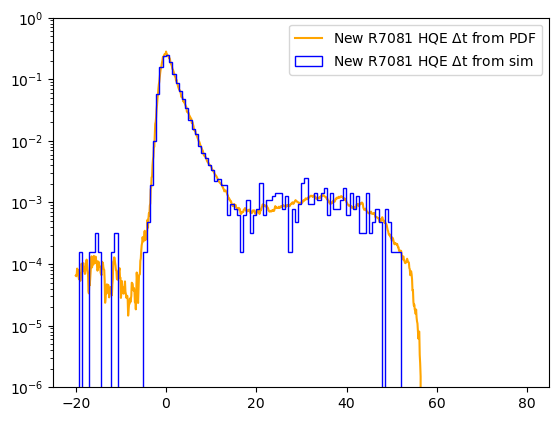

In [51]:
time_r7081=[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19.4, -19.3, -19.2, -19.1, -19.0, -18.9, -18.8, -18.7, -18.6, -18.5, -18.4, -18.3, -18.2, -18.1, -18.0, -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3, -17.2, -17.1, -17.0, -16.9, -16.8, -16.7, -16.6, -16.5, -16.4, -16.3, -16.2, -16.1, -16.0, -15.9, -15.8, -15.7, -15.6, -15.5, -15.4, -15.3, -15.2, -15.1, -15.0, -14.9, -14.8, -14.7, -14.6, -14.5, -14.4, -14.3, -14.2, -14.1, -14.0, -13.9, -13.8, -13.7, -13.6, -13.5, -13.4, -13.3, -13.2, -13.1, -13.0, -12.9, -12.8, -12.7, -12.6, -12.5, -12.4, -12.3, -12.2, -12.1, -12.0, -11.9, -11.8, -11.7, -11.6, -11.5, -11.4, -11.3, -11.2, -11.1, -11.0, -10.9, -10.8, -10.7, -10.6, -10.5, -10.4, -10.3, -10.2, -10.1, -10.0, -9.9, -9.8, -9.7, -9.6, -9.5, -9.4, -9.3, -9.2, -9.1, -9.0, -8.9, -8.8, -8.7, -8.6, -8.5, -8.4, -8.3, -8.2, -8.1, -8.0, -7.9, -7.8, -7.7, -7.6, -7.5, -7.4, -7.3, -7.2, -7.1, -7.0, -6.9, -6.8, -6.7, -6.6, -6.5, -6.4, -6.3, -6.2, -6.1, -6.0, -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5.0, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4.0, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3.0, -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2.0, -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36.0, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37.0, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9, 40.0, 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.0, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45.0, 45.1, 45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46.0, 46.1, 46.2, 46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47.0, 47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48.0, 48.1, 48.2, 48.3, 48.4, 48.5, 48.6, 48.7, 48.8, 48.9, 49.0, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50.0, 50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51.0, 51.1, 51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0, 52.1, 52.2, 52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53.0, 53.1, 53.2, 53.3, 53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54.0, 54.1, 54.2, 54.3, 54.4, 54.5, 54.6, 54.7, 54.8, 54.9, 55.0, 55.1, 55.2, 55.3, 55.4, 55.5, 55.6, 55.7, 55.8, 55.9, 56.0, 56.1, 56.2, 56.3, 56.4, 56.5, 56.6, 56.7, 56.8, 56.9, 57.0, 57.1, 57.2, 57.3, 57.4, 57.5, 57.6, 57.7, 57.8, 57.9, 58.0, 58.1, 58.2, 58.3, 58.4, 58.5, 58.6, 58.7, 58.8, 58.9, 59.0, 59.1, 59.2, 59.3, 59.4, 59.5, 59.6, 59.7, 59.8, 59.9, 60.0, 60.1, 60.2, 60.3, 60.4, 60.5, 60.6, 60.7, 60.8, 60.9, 61.0, 61.1, 61.2, 61.3, 61.4, 61.5, 61.6, 61.7, 61.8, 61.9, 62.0, 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 62.9, 63.0, 63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64.0, 64.1, 64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65.0, 65.1, 65.2, 65.3, 65.4, 65.5, 65.6, 65.7, 65.8, 65.9, 66.0, 66.1, 66.2, 66.3, 66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67.0, 67.1, 67.2, 67.3, 67.4, 67.5, 67.6, 67.7, 67.8, 67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6, 68.7, 68.8, 68.9, 69.0, 69.1, 69.2, 69.3, 69.4, 69.5, 69.6, 69.7, 69.8, 69.9, 70.0, 70.1, 70.2, 70.3, 70.4, 70.5, 70.6, 70.7, 70.8, 70.9, 71.0, 71.1, 71.2, 71.3, 71.4, 71.5, 71.6, 71.7, 71.8, 71.9, 72.0, 72.1, 72.2, 72.3, 72.4, 72.5, 72.6, 72.7, 72.8, 72.9, 73.0, 73.1, 73.2, 73.3, 73.4, 73.5, 73.6, 73.7, 73.8, 73.9, 74.0, 74.1, 74.2, 74.3, 74.4, 74.5, 74.6, 74.7, 74.8, 74.9, 75.0, 75.1, 75.2, 75.3, 75.4, 75.5, 75.6, 75.7, 75.8, 75.9, 76.0, 76.1, 76.2, 76.3, 76.4, 76.5, 76.6, 76.7, 76.8, 76.9, 77.0, 77.1, 77.2, 77.3, 77.4, 77.5, 77.6, 77.7, 77.8, 77.9, 78.0, 78.1, 78.2, 78.3, 78.4, 78.5, 78.6, 78.7, 78.8, 78.9, 79.0, 79.1, 79.2, 79.3, 79.4, 79.5, 79.6, 79.7, 79.8, 79.9]
prob_r7081=[6.477252353059517e-05, 6.348617582325043e-05, 6.793208358336707e-05, 8.445732842750556e-05, 7.382786436570154e-05, 7.955318926776599e-05, 6.355868820653137e-05, 5.7480415704341046e-05, 5.6137747036024574e-05, 7.043320410496692e-05, 5.338496618848535e-05, 6.075778889578633e-05, 7.407394646812904e-05, 0.00010165281338374672, 8.517348788952202e-05, 7.625027970639368e-05, 9.988751418831232e-05, 0.00010342222024553053, 7.70735638400986e-05, 7.807549391069289e-05, 6.935248571117271e-05, 6.998326324062485e-05, 9.024670219333605e-05, 0.00010338362850007858, 0.00011802476948641426, 9.740157484353468e-05, 8.149093718351635e-05, 7.24927249180435e-05, 3.710073407021764e-05, 3.344191172921618e-05, 5.440009087108409e-05, 4.5368378129443233e-05, 6.038691908504901e-05, 8.6158044028775e-05, 0.00011356011595059848, 0.00013344233023240623, 8.8364192253771e-05, 0.00010247468501179801, 0.00011996726790247506, 9.845620090289506e-05, 0.00013600723277675013, 0.00013098484401589974, 0.00011035728360102721, 0.0001039183416477365, 0.00013201887364337484, 0.00010882513685748184, 0.0001141504926869184, 9.468749341407591e-05, 7.8102623335792e-05, 8.296090425972585e-05, 0.0001099372369826066, 0.00010456630043342223, 8.998225755353459e-05, 9.100116636486086e-05, 9.100116636486086e-05, 7.2159457316826e-05, 6.898716300973026e-05, 6.593043657575144e-05, 0.00010905954197436566, 9.196220435042773e-05, 0.00010548956744737956, 8.949687433396928e-05, 8.248300296497247e-05, 8.02086136390249e-05, 5.373240203429831e-05, 2.3546801826207743e-05, 2.8229326288755025e-05, 4.014060163739137e-05, 3.302411095789824e-05, 4.692259503123386e-05, 4.073983559758895e-05, 4.3452627250992835e-05, 4.604091002580038e-05, 4.0345741640386196e-05, 2.882210524957145e-05, 3.5930461664778004e-05, 3.4722676164738374e-05, 4.2612524939796124e-05, 4.0055147925026844e-05, 4.1788784782951244e-05, 3.107278905797711e-05, 4.649149975145899e-05, 5.63217059557079e-05, 0.00010907077497495745, 0.00011037687401565938, 0.00012863675822466234, 0.00012536384275912122, 0.00010562880600707437, 9.441342905102773e-05, 7.953288445303771e-05, 7.742909992558116e-05, 5.7629211826183025e-05, 5.6145577200481176e-05, 5.5644504861085397e-05, 6.643280141727571e-05, 8.0197957129015e-05, 7.913473506116639e-05, 8.571239779441908e-05, 5.927927797283073e-05, 6.013324720245541e-05, 2.8245087279734917e-05, 3.496324936184189e-05, 5.311062267682107e-05, 4.1979453965307246e-05, 4.1979453965307246e-05, 3.388757755885332e-05, 3.305767758596304e-05, 3.525527401929168e-05, 4.0734573724923696e-05, 5.2297842337426384e-05, 3.5680758081095176e-05, 3.269292058104538e-05, 2.8318373071267627e-05, 2.942230993990992e-05, 3.059651151583998e-05, 2.6525153221805833e-05, 1.457575682515605e-05, 1.773697019058944e-05, 2.2416418800770488e-05, 2.257480165066759e-05, 2.7652830137654773e-05, 2.4076689618503393e-05, 2.6881304484458204e-05, 3.0388272008751485e-05, 4.9805025347800534e-05, 4.8786116536474274e-05, 4.7519522021537674e-05, 3.908826186196192e-05, 3.7275250612432294e-05, 4.075489723567588e-05, 3.620975733263459e-05, 2.396325690252934e-05, 2.818390760848226e-05, 1.8399208188161776e-05, 3.377313111092209e-05, 7.294546435136008e-05, 5.536769528166061e-05, 3.143135829726817e-05, 2.3369313812133695e-05, 4.156828046189913e-05, 6.499369624136096e-05, 6.77724413542461e-05, 6.842364526305239e-05, 0.00011299002785965097, 0.00012275441666754838, 0.00016362823121151952, 0.00020256019967639788, 0.00022134992058147357, 0.0002738979236482061, 0.00024623601341858606, 0.00023311762681932523, 0.00026495651912310475, 0.0003346621012601187, 0.00034722055040930426, 0.0002441677996068758, 0.0002547984612228517, 0.00026323836099870776, 0.00030610242718651125, 0.0003495719242353383, 0.0005238396120580362, 0.0003911448822705417, 0.0005561853574383015, 0.0006672899821509159, 0.0006055986611114107, 0.0008833096993116188, 0.0009676346338052165, 0.0016240775933440501, 0.0017672408146613182, 0.0025633840248083287, 0.0026161545951266948, 0.00398318727254936, 0.004962114009045049, 0.0055648638494915975, 0.00800311878955415, 0.008033189673788344, 0.011837382011471002, 0.018909052240062393, 0.020293664637011394, 0.024533990462792993, 0.03275245175642565, 0.038387087140148726, 0.048380215591406456, 0.056826122516721214, 0.07058004326357861, 0.08258529967669942, 0.0916455267887405, 0.10958816258785482, 0.12682253882045447, 0.1434877017232469, 0.1530903345621013, 0.17138284542750098, 0.1871042372442064, 0.20195912701441762, 0.22855474578211799, 0.2284234453420588, 0.24060223767057617, 0.2491223228093282, 0.2573556226716726, 0.25376363152244585, 0.25322101794256086, 0.2820837064117872, 0.26089521821859124, 0.2564608797624283, 0.24463585557082504, 0.2428983822437708, 0.23627854126724107, 0.2290052633973221, 0.2184050790970223, 0.21928746629491505, 0.204847532485145, 0.18387075461867092, 0.17717949674760233, 0.17067336386928286, 0.1617616276343386, 0.14707768432331275, 0.1445287308047978, 0.1380731386908586, 0.13053771294096175, 0.12255514768671885, 0.11455242225984735, 0.11011543642583253, 0.10841068056190524, 0.09561660107325427, 0.09864840966106352, 0.08741885295974364, 0.08486009036729417, 0.07898489028339077, 0.07463935779181956, 0.07143271189678269, 0.06768633238913768, 0.06703523712103614, 0.06472405073928257, 0.061645808415290076, 0.05579486448748302, 0.051480274304478206, 0.05261774944453946, 0.05175431684414256, 0.048624247838707224, 0.043878443088980396, 0.045041144851781074, 0.042476885585781714, 0.04118934523199208, 0.03965706530169752, 0.03773648110846456, 0.03635043180839318, 0.03536740025768421, 0.030195469562738084, 0.02926289137077158, 0.029287360446725412, 0.02865475861462766, 0.028380662541886894, 0.025974829368660714, 0.025766072336376587, 0.023406008873739746, 0.02409863992756747, 0.02218985820421659, 0.02276703258125506, 0.019409888796973716, 0.020405022520219158, 0.01935076541768937, 0.018190797028113444, 0.01704553261049499, 0.01502680615350822, 0.01474038008086707, 0.014712320634946733, 0.014205064455623797, 0.01309631762208202, 0.012462770938811546, 0.012118113331760298, 0.011661528676801527, 0.011101733953443344, 0.010711796027830747, 0.010067407064930051, 0.009753542203596328, 0.009560190299415768, 0.009047803434667255, 0.008449278275985779, 0.00822164298848175, 0.007785404082315767, 0.007541814728860119, 0.007108591810872267, 0.0070545646391824085, 0.006645166209823819, 0.006078298553505754, 0.0058119767160180425, 0.005859219086539421, 0.005610060509874662, 0.005581983379608238, 0.005379638927676481, 0.005122682496928328, 0.004877986701762748, 0.004688272333678806, 0.0045376839188655035, 0.0044221617565842145, 0.004383689063658286, 0.004236810239972744, 0.004122426020638779, 0.004036237485146081, 0.003965527711290436, 0.003931096441724829, 0.003804809946056022, 0.003641965443955986, 0.0034827108422241975, 0.0033846853120244247, 0.00324893937083717, 0.0031719930517043094, 0.003103870404963038, 0.0029875808506133203, 0.002900935213478475, 0.002780714161054188, 0.002769677330373324, 0.002690632281420849, 0.002636353441738061, 0.0025218426801400435, 0.002447730333021582, 0.002328995151263157, 0.002231595220276596, 0.0021945676413842857, 0.002135955770995419, 0.0020969617515846756, 0.0020657110643956225, 0.0020158552778416134, 0.001982351214560624, 0.0019805071398388743, 0.0019098167610905614, 0.0017954098488990086, 0.0017528636488418035, 0.0016718690099322073, 0.0016329275168957724, 0.0015165688911824128, 0.0015464694297105052, 0.0015583847247299589, 0.0015743878220866822, 0.001506847684021037, 0.001473297714794476, 0.001389246966288985, 0.0013246436396736304, 0.001301157304633241, 0.0011878678894217758, 0.0011312114170140505, 0.001162979598208417, 0.0010927434614679315, 0.001086634976772306, 0.001038082359804853, 0.0010407348619034728, 0.0009691920829083033, 0.000915493852824466, 0.0008875955217424309, 0.0008715484656388788, 0.0008723973034796597, 0.0009264329293718659, 0.0009416601682760658, 0.000891853307431501, 0.0008940190909326513, 0.0009143648545747814, 0.0008403197435399311, 0.0008269491612392733, 0.0008052249832100495, 0.0007967946622713926, 0.0007597311980791021, 0.000789618797146411, 0.0008172969367915045, 0.0007923494311441249, 0.0007926997646358431, 0.00074451794949939, 0.0006688918623739651, 0.0006515742371786978, 0.0006704547551971815, 0.0007019536397269389, 0.0006935529982528778, 0.0007015943711248307, 0.0006997356166981935, 0.0007577125445386513, 0.0007692482521234537, 0.0007850755748704901, 0.0008113311915955422, 0.0007776822513929284, 0.0007421263471773433, 0.0007400438800006997, 0.0007151005196280323, 0.0007229826859854299, 0.0007212031004830093, 0.0007605475167023334, 0.0007480126762663227, 0.000729439764178233, 0.0007658571618520917, 0.0007656605451607257, 0.000673517324773504, 0.0006870047209733313, 0.0007039475436592963, 0.0006725352230890687, 0.000698706401674876, 0.0007418140342943362, 0.0007268340492180675, 0.00072249713164849, 0.0007466940238153114, 0.0007300151033372132, 0.000673770559073901, 0.0006534045668018034, 0.0006578095410031203, 0.0006565554577737266, 0.0006998637081165414, 0.000727332641314213, 0.0007162062040809666, 0.0007386808505386247, 0.0007250260936778438, 0.0006823213146177064, 0.0006510759570805077, 0.000676198452744269, 0.0007611942844050568, 0.0007488790677320844, 0.0007806164537008929, 0.000839481679158738, 0.0008674158495339884, 0.0009314650203596893, 0.0008966471017324629, 0.0008822849341902681, 0.0008904328035961904, 0.0009113657648807172, 0.0008802668708218677, 0.0008575158273722622, 0.0008684075298001558, 0.00089094080086704, 0.0008816098071446907, 0.0008349961855137607, 0.0008305285913112999, 0.0008027654884682661, 0.0007395182349051713, 0.0007353271561106947, 0.0007103736554104528, 0.0007120338930238903, 0.0007273331606178587, 0.0007294835157543901, 0.000714170739578089, 0.0007220488758085163, 0.000744579679237396, 0.0007504391651507646, 0.0007305505592184491, 0.0007583803922498071, 0.0007292345664518433, 0.0007549217308075296, 0.0008232064700395643, 0.0008723419690253134, 0.0008350713533177435, 0.0008143424204788662, 0.0008293301822506116, 0.0008212688873606518, 0.0008114220220197181, 0.0008161573790109865, 0.0008167504104169025, 0.0008536310335749183, 0.0008163479330851397, 0.0008328252282724972, 0.0008289613271812287, 0.0008660930614690373, 0.0008487122468446958, 0.0008596424400759285, 0.0008400360365855506, 0.0008648109381310533, 0.0009065230368304742, 0.0009044828068631033, 0.0008736461463315946, 0.0008707561211389352, 0.0008792716586349799, 0.0008807424357449273, 0.0008393169161990306, 0.0008693749082506838, 0.0009005487373930423, 0.0009050356765527096, 0.0008874614220334384, 0.0009028395002046273, 0.0008698956824216952, 0.0008631016315582788, 0.0008989207810641069, 0.0008783082902820111, 0.0009077204299910846, 0.0009351404997291115, 0.0009562432067302299, 0.000952325169577925, 0.0009684892008223847, 0.0010069582671761814, 0.0009929701581041274, 0.0009500333033939457, 0.0009714336867440623, 0.0010094188488159763, 0.0010263036302288653, 0.001066138172586637, 0.0010903268362323344, 0.001063782036476037, 0.0010458301782465184, 0.0010447138557371526, 0.001019153337696071, 0.001013584729567817, 0.001000754447389983, 0.0009800947943578412, 0.0009740036431140253, 0.0009865604092576113, 0.0009950646084456159, 0.0009913470127772093, 0.0009547193760449306, 0.0009956958064617084, 0.0009978955953752887, 0.0009961479314133971, 0.0010440441407649846, 0.001083732320446109, 0.0010579451554023856, 0.00108122268858253, 0.0010874798669719423, 0.0011008849793836786, 0.0011638762694319935, 0.0011551849962247083, 0.0011381159065113956, 0.0011265056444083393, 0.0011330460913237018, 0.0011985274576965465, 0.0011533638666393336, 0.0011943880237875544, 0.0012276619632670609, 0.0012382909580606523, 0.0012483414935404882, 0.0012791500993048393, 0.0012861673567284616, 0.0012782639010811357, 0.0012813903862058439, 0.0012548557946504408, 0.001228401381624211, 0.0012619786594221206, 0.001301621403070053, 0.0012961116334923354, 0.0012403312468672511, 0.0012524529032390506, 0.0011953054053893493, 0.0012060564140384121, 0.0011442378448776218, 0.001160413685001645, 0.001166269997021503, 0.0011647263365542565, 0.0011733046716740345, 0.0011807247753037715, 0.0011734620563062601, 0.0012279209360652745, 0.0012330275317243408, 0.0011921195596537532, 0.0012571256725664318, 0.0012867568201126488, 0.0012484167786915871, 0.0013098270197096137, 0.0013065698409167224, 0.0013147769029435968, 0.001311450238153923, 0.0012800321724894836, 0.001258787264289903, 0.0012456445093026955, 0.0012303321548838035, 0.0012320486171679258, 0.0011921398109822144, 0.0011488782638858022, 0.0011813470402648517, 0.0010895429492724287, 0.0010758175607251646, 0.0010751100804153428, 0.0010087218039974317, 0.0009855791825395003, 0.000986604177560075, 0.0009348063152675961, 0.0009749714089358521, 0.0009990384158068803, 0.0009742603270217396, 0.0009767906358257399, 0.0010246273728539903, 0.0010482581059688266, 0.0010789786780337912, 0.001023076674336257, 0.0010250501195552743, 0.0010412561651603194, 0.0011051853451426777, 0.0011595942842885642, 0.0011363235529010694, 0.001149892696729983, 0.0012028466414010556, 0.0011917827092183299, 0.0011850498907971542, 0.00118743839878541, 0.0012401536901102156, 0.0012059418535345198, 0.0012272780467957693, 0.0012080435725636165, 0.0012503522627418434, 0.0012676871908732271, 0.001256705301442766, 0.0012385780923723333, 0.0012009465134665423, 0.001200320883945927, 0.0011688929533184172, 0.0011552074045963097, 0.0011633354094544035, 0.00110621391377618, 0.0011503815652792065, 0.0010964180263629234, 0.0010618379384507398, 0.0010020971179296899, 0.0009834285629412097, 0.000942328610365632, 0.0009216038073434782, 0.0009149072228003427, 0.0008843616707972392, 0.0008894430104845234, 0.0008856740200677274, 0.0008840823898875433, 0.0008679373402398625, 0.0008213169422164032, 0.0008628825946387933, 0.0008425981670642341, 0.0008450019699568192, 0.0008148770017661419, 0.0008174407518616426, 0.0008269967124411735, 0.0008479232684219588, 0.0008274066995573083, 0.0008123690064023324, 0.0008087987491785054, 0.0008317414452848168, 0.0009276967304371191, 0.000940978560064293, 0.0009285181928470171, 0.0009465686101171148, 0.0009110930774147362, 0.0008730704227412348, 0.0008799885741971162, 0.0009358516506702412, 0.0009555383352536244, 0.000958052938152182, 0.0009513246038341637, 0.0009919682257856462, 0.0009969551339985667, 0.0009821198899507434, 0.0009452774818384161, 0.0008285279450277413, 0.0007905093885965081, 0.0007609780693651849, 0.0007603692136307383, 0.0007722903350102391, 0.0007953705243259617, 0.0007874805933532758, 0.0007311601269660439, 0.0007181084531572374, 0.0006947060493442503, 0.0006849749941544723, 0.0006795254374710215, 0.0006817447256809376, 0.0006595791340483788, 0.000665523727736966, 0.0006678392138176805, 0.0006817940255568593, 0.0007108888681985797, 0.0006782539124780499, 0.0006572416128689651, 0.0006516755341735641, 0.0006533391298093658, 0.0006620327289028297, 0.000669884524832609, 0.0006628488257383767, 0.0006757625270679664, 0.0006104180740993998, 0.0005742795864006878, 0.0005837921317726422, 0.0005826659198672542, 0.0005764842448558767, 0.0005666268115920568, 0.0005654560348569379, 0.0005512693247456139, 0.0005596276447651971, 0.000522054364162425, 0.0004817026923851729, 0.00048209375698934583, 0.000498478431903131, 0.0005376519755893093, 0.0005094506427532504, 0.0005440332724049755, 0.0005767609784448582, 0.0005480546896764463, 0.0005121423649260272, 0.0004954595271937462, 0.0005078025176866161, 0.0004697644529298235, 0.0004905604988973777, 0.00045531857720056465, 0.0004525444756889133, 0.00044681261704943053, 0.0004248378224842452, 0.0003874679790801792, 0.00035445538237918116, 0.00034213510409150454, 0.0003117736554552417, 0.0002986818742155594, 0.00029325463628695765, 0.00030294450977420503, 0.00028243182039848865, 0.0002692964443383936, 0.00027770074792435307, 0.00024224507715838318, 0.000268141768562914, 0.0002665642467692157, 0.0002558903959695824, 0.00023524693905191236, 0.00022445451327505282, 0.00020969299361736423, 0.00021830356305151425, 0.0002201523758776128, 0.0002151742414730256, 0.00020979579677707572, 0.00020542109631419228, 0.0002118909685898052, 0.00020046590858797603, 0.00018594672847469857, 0.00018750780675214822, 0.0001674212686939071, 0.0001610285556975684, 0.00016600023092290208, 0.00015967602718616102, 0.0001648991088887076, 0.00016266116522186522, 0.00013815573567225157, 0.00011923033747776689, 0.00012199897629120568, 0.00013351478638666764, 0.00013259789588740688, 0.00011548631676490317, 0.0001164189449360768, 0.00010585150068370135, 0.00010334205656316516, 0.00010519157523359957, 0.00010675265351104919, 0.00010892208791829406, 0.0001219989762912057, 0.00011577475715788788, 0.00010955053802457009, 0.00010768528168222282, 0.00010582002533987556, 8.621473976874856e-05, 8.280414282086451e-05, 6.599674176325838e-05, 7.408621723892345e-05, 7.657992368754671e-05, 6.850618588379456e-05, 5.670193539534787e-05, 3.7112387496133704e-05, 3.802927799539446e-05, 2.43597711646005e-05, 2.108168371179756e-05, 2.201431188297118e-05, 1.8283799198276677e-05, 1.7351171027103043e-05, 1.5485914684755792e-05, 1.8283799198276677e-05, 1.3620658342408534e-05, 1.1755402000061286e-05, 1.0822773828887655e-05, 8.02488931536677e-06, 6.159632973019523e-06, 8.024889315366777e-06, 8.02488931536677e-06, 3.3617484594986327e-06, 2.429120288325009e-06, 1.496492117151383e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
for i in range(len(prob_r7081)):
    prob_r7081[i]=prob_r7081[i]
    
sum=0
for i in prob_r7081:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)
    
plt.plot(time_r7081,prob_r7081,label='New R7081 HQE $\Delta$t from PDF',color='orange')
plt.hist(r7081_deltat,bins=100,density=True,histtype='step',color='blue',label='New R7081 HQE $\Delta$t from sim');
plt.yscale('log')
plt.legend()
plt.ylim(1e-6,1)

Sum of probability is 337.90477948418817


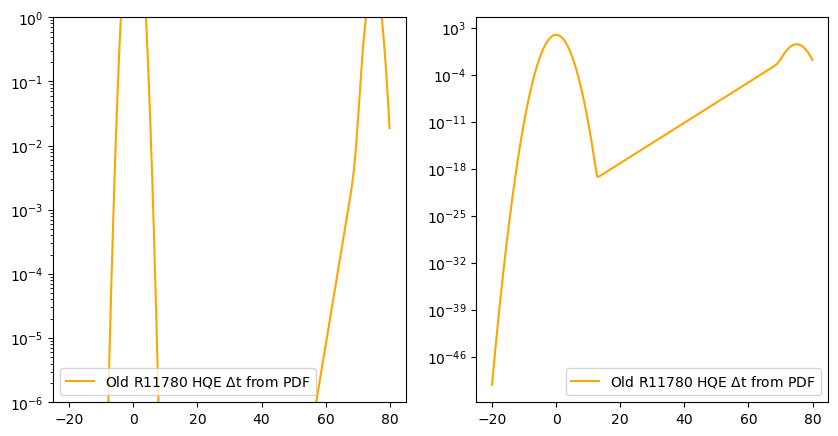

In [59]:
time_r11780_old=[-20.0 , -19.9 , -19.8 , -19.7 , -19.6 , -19.5 , -19.4 , -19.3 , -19.2 , -19.1 , -19.0 , -18.9 , -18.8 , -18.7 , -18.6 , -18.5 , -18.4 , -18.3 , -18.2 , -18.1 , -18.0 , -17.9 , -17.8 , -17.7 , -17.6 , -17.5 , -17.4 , -17.3 , -17.2 , -17.1 , -17.0 , -16.9 , -16.8 , -16.7 , -16.6 , -16.5 , -16.4 , -16.3 , -16.2 , -16.1 , -16.0 , -15.9 , -15.8 , -15.7 , -15.6 , -15.5 , -15.4 , -15.3 , -15.2 , -15.1 , -15.0 , -14.9 , -14.8 , -14.7 , -14.6 , -14.5 , -14.4 , -14.3 , -14.2 , -14.1 , -14.0 , -13.9 , -13.8 , -13.7 , -13.6 , -13.5 , -13.4 , -13.3 , -13.2 , -13.1 , -13.0 , -12.9 , -12.8 , -12.7 , -12.6 , -12.5 , -12.4 , -12.3 , -12.2 , -12.1 , -12.0 , -11.9 , -11.8 , -11.7 , -11.6 , -11.5 , -11.4 , -11.3 , -11.2 , -11.1 , -11.0 , -10.9 , -10.8 , -10.7 , -10.6 , -10.5 , -10.4 , -10.3 , -10.2 , -10.1 , -10.0 , -9.9 , -9.8 , -9.7 , -9.6 , -9.5 , -9.4 , -9.3 , -9.2 , -9.1 , -9.0 , -8.9 , -8.8 , -8.7 , -8.6 , -8.5 , -8.4 , -8.3 , -8.2 , -8.1 , -8.0 , -7.9 , -7.8 , -7.7 , -7.6 , -7.5 , -7.4 , -7.3 , -7.2 , -7.1 , -7.0 , -6.9 , -6.8 , -6.7 , -6.6 , -6.5 , -6.4 , -6.3 , -6.2 , -6.1 , -6.0 , -5.9 , -5.8 , -5.7 , -5.6 , -5.5 , -5.4 , -5.3 , -5.2 , -5.1 , -5.0 , -4.9 , -4.8 , -4.7 , -4.6 , -4.5 , -4.4 , -4.3 , -4.2 , -4.1 , -4.0 , -3.9 , -3.8 , -3.7 , -3.6 , -3.5 , -3.4 , -3.3 , -3.2 , -3.1 , -3.0 , -2.9 , -2.8 , -2.7 , -2.6 , -2.5 , -2.4 , -2.3 , -2.2 , -2.1 , -2.0 , -1.9 , -1.8 , -1.7 , -1.6 , -1.5 , -1.4 , -1.3 , -1.2 , -1.1 , -1.0 , -0.9 , -0.8 , -0.7 , -0.6 , -0.5 , -0.4 , -0.3 , -0.2 , -0.1 , 0.0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0 , 2.1 , 2.2 , 2.3 , 2.4 , 2.5 , 2.6 , 2.7 , 2.8 , 2.9 , 3.0 , 3.1 , 3.2 , 3.3 , 3.4 , 3.5 , 3.6 , 3.7 , 3.8 , 3.9 , 4.0 , 4.1 , 4.2 , 4.3 , 4.4 , 4.5 , 4.6 , 4.7 , 4.8 , 4.9 , 5.0 , 5.1 , 5.2 , 5.3 , 5.4 , 5.5 , 5.6 , 5.7 , 5.8 , 5.9 , 6.0 , 6.1 , 6.2 , 6.3 , 6.4 , 6.5 , 6.6 , 6.7 , 6.8 , 6.9 , 7.0 , 7.1 , 7.2 , 7.3 , 7.4 , 7.5 , 7.6 , 7.7 , 7.8 , 7.9 , 8.0 , 8.1 , 8.2 , 8.3 , 8.4 , 8.5 , 8.6 , 8.7 , 8.8 , 8.9 , 9.0 , 9.1 , 9.2 , 9.3 , 9.4 , 9.5 , 9.6 , 9.7 , 9.8 , 9.9 , 10.0 , 10.1 , 10.2 , 10.3 , 10.4 , 10.5 , 10.6 , 10.7 , 10.8 , 10.9 , 11.0 , 11.1 , 11.2 , 11.3 , 11.4 , 11.5 , 11.6 , 11.7 , 11.8 , 11.9 , 12.0 , 12.1 , 12.2 , 12.3 , 12.4 , 12.5 , 12.6 , 12.7 , 12.8 , 12.9 , 13.0 , 13.1 , 13.2 , 13.3 , 13.4 , 13.5 , 13.6 , 13.7 , 13.8 , 13.9 , 14.0 , 14.1 , 14.2 , 14.3 , 14.4 , 14.5 , 14.6 , 14.7 , 14.8 , 14.9 , 15.0 , 15.1 , 15.2 , 15.3 , 15.4 , 15.5 , 15.6 , 15.7 , 15.8 , 15.9 , 16.0 , 16.1 , 16.2 , 16.3 , 16.4 , 16.5 , 16.6 , 16.7 , 16.8 , 16.9 , 17.0 , 17.1 , 17.2 , 17.3 , 17.4 , 17.5 , 17.6 , 17.7 , 17.8 , 17.9 , 18.0 , 18.1 , 18.2 , 18.3 , 18.4 , 18.5 , 18.6 , 18.7 , 18.8 , 18.9 , 19.0 , 19.1 , 19.2 , 19.3 , 19.4 , 19.5 , 19.6 , 19.7 , 19.8 , 19.9 , 20.0 , 20.1 , 20.2 , 20.3 , 20.4 , 20.5 , 20.6 , 20.7 , 20.8 , 20.9 , 21.0 , 21.1 , 21.2 , 21.3 , 21.4 , 21.5 , 21.6 , 21.7 , 21.8 , 21.9 , 22.0 , 22.1 , 22.2 , 22.3 , 22.4 , 22.5 , 22.6 , 22.7 , 22.8 , 22.9 , 23.0 , 23.1 , 23.2 , 23.3 , 23.4 , 23.5 , 23.6 , 23.7 , 23.8 , 23.9 , 24.0 , 24.1 , 24.2 , 24.3 , 24.4 , 24.5 , 24.6 , 24.7 , 24.8 , 24.9 , 25.0 , 25.1 , 25.2 , 25.3 , 25.4 , 25.5 , 25.6 , 25.7 , 25.8 , 25.9 , 26.0 , 26.1 , 26.2 , 26.3 , 26.4 , 26.5 , 26.6 , 26.7 , 26.8 , 26.9 , 27.0 , 27.1 , 27.2 , 27.3 , 27.4 , 27.5 , 27.6 , 27.7 , 27.8 , 27.9 , 28.0 , 28.1 , 28.2 , 28.3 , 28.4 , 28.5 , 28.6 , 28.7 , 28.8 , 28.9 , 29.0 , 29.1 , 29.2 , 29.3 , 29.4 , 29.5 , 29.6 , 29.7 , 29.8 , 29.9 , 30.0 , 30.1 , 30.2 , 30.3 , 30.4 , 30.5 , 30.6 , 30.7 , 30.8 , 30.9 , 31.0 , 31.1 , 31.2 , 31.3 , 31.4 , 31.5 , 31.6 , 31.7 , 31.8 , 31.9 , 32.0 , 32.1 , 32.2 , 32.3 , 32.4 , 32.5 , 32.6 , 32.7 , 32.8 , 32.9 , 33.0 , 33.1 , 33.2 , 33.3 , 33.4 , 33.5 , 33.6 , 33.7 , 33.8 , 33.9 , 34.0 , 34.1 , 34.2 , 34.3 , 34.4 , 34.5 , 34.6 , 34.7 , 34.8 , 34.9 , 35.0 , 35.1 , 35.2 , 35.3 , 35.4 , 35.5 , 35.6 , 35.7 , 35.8 , 35.9 , 36.0 , 36.1 , 36.2 , 36.3 , 36.4 , 36.5 , 36.6 , 36.7 , 36.8 , 36.9 , 37.0 , 37.1 , 37.2 , 37.3 , 37.4 , 37.5 , 37.6 , 37.7 , 37.8 , 37.9 , 38.0 , 38.1 , 38.2 , 38.3 , 38.4 , 38.5 , 38.6 , 38.7 , 38.8 , 38.9 , 39.0 , 39.1 , 39.2 , 39.3 , 39.4 , 39.5 , 39.6 , 39.7 , 39.8 , 39.9 , 40.0 , 40.1 , 40.2 , 40.3 , 40.4 , 40.5 , 40.6 , 40.7 , 40.8 , 40.9 , 41.0 , 41.1 , 41.2 , 41.3 , 41.4 , 41.5 , 41.6 , 41.7 , 41.8 , 41.9 , 42.0 , 42.1 , 42.2 , 42.3 , 42.4 , 42.5 , 42.6 , 42.7 , 42.8 , 42.9 , 43.0 , 43.1 , 43.2 , 43.3 , 43.4 , 43.5 , 43.6 , 43.7 , 43.8 , 43.9 , 44.0 , 44.1 , 44.2 , 44.3 , 44.4 , 44.5 , 44.6 , 44.7 , 44.8 , 44.9 , 45.0 , 45.1 , 45.2 , 45.3 , 45.4 , 45.5 , 45.6 , 45.7 , 45.8 , 45.9 , 46.0 , 46.1 , 46.2 , 46.3 , 46.4 , 46.5 , 46.6 , 46.7 , 46.8 , 46.9 , 47.0 , 47.1 , 47.2 , 47.3 , 47.4 , 47.5 , 47.6 , 47.7 , 47.8 , 47.9 , 48.0 , 48.1 , 48.2 , 48.3 , 48.4 , 48.5 , 48.6 , 48.7 , 48.8 , 48.9 , 49.0 , 49.1 , 49.2 , 49.3 , 49.4 , 49.5 , 49.6 , 49.7 , 49.8 , 49.9 , 50.0 , 50.1 , 50.2 , 50.3 , 50.4 , 50.5 , 50.6 , 50.7 , 50.8 , 50.9 , 51.0 , 51.1 , 51.2 , 51.3 , 51.4 , 51.5 , 51.6 , 51.7 , 51.8 , 51.9 , 52.0 , 52.1 , 52.2 , 52.3 , 52.4 , 52.5 , 52.6 , 52.7 , 52.8 , 52.9 , 53.0 , 53.1 , 53.2 , 53.3 , 53.4 , 53.5 , 53.6 , 53.7 , 53.8 , 53.9 , 54.0 , 54.1 , 54.2 , 54.3 , 54.4 , 54.5 , 54.6 , 54.7 , 54.8 , 54.9 , 55.0 , 55.1 , 55.2 , 55.3 , 55.4 , 55.5 , 55.6 , 55.7 , 55.8 , 55.9 , 56.0 , 56.1 , 56.2 , 56.3 , 56.4 , 56.5 , 56.6 , 56.7 , 56.8 , 56.9 , 57.0 , 57.1 , 57.2 , 57.3 , 57.4 , 57.5 , 57.6 , 57.7 , 57.8 , 57.9 , 58.0 , 58.1 , 58.2 , 58.3 , 58.4 , 58.5 , 58.6 , 58.7 , 58.8 , 58.9 , 59.0 , 59.1 , 59.2 , 59.3 , 59.4 , 59.5 , 59.6 , 59.7 , 59.8 , 59.9 , 60.0 , 60.1 , 60.2 , 60.3 , 60.4 , 60.5 , 60.6 , 60.7 , 60.8 , 60.9 , 61.0 , 61.1 , 61.2 , 61.3 , 61.4 , 61.5 , 61.6 , 61.7 , 61.8 , 61.9 , 62.0 , 62.1 , 62.2 , 62.3 , 62.4 , 62.5 , 62.6 , 62.7 , 62.8 , 62.9 , 63.0 , 63.1 , 63.2 , 63.3 , 63.4 , 63.5 , 63.6 , 63.7 , 63.8 , 63.9 , 64.0 , 64.1 , 64.2 , 64.3 , 64.4 , 64.5 , 64.6 , 64.7 , 64.8 , 64.9 , 65.0 , 65.1 , 65.2 , 65.3 , 65.4 , 65.5 , 65.6 , 65.7 , 65.8 , 65.9 , 66.0 , 66.1 , 66.2 , 66.3 , 66.4 , 66.5 , 66.6 , 66.7 , 66.8 , 66.9 , 67.0 , 67.1 , 67.2 , 67.3 , 67.4 , 67.5 , 67.6 , 67.7 , 67.8 , 67.9 , 68.0 , 68.1 , 68.2 , 68.3 , 68.4 , 68.5 , 68.6 , 68.7 , 68.8 , 68.9 , 69.0 , 69.1 , 69.2 , 69.3 , 69.4 , 69.5 , 69.6 , 69.7 , 69.8 , 69.9 , 70.0 , 70.1 , 70.2 , 70.3 , 70.4 , 70.5 , 70.6 , 70.7 , 70.8 , 70.9 , 71.0 , 71.1 , 71.2 , 71.3 , 71.4 , 71.5 , 71.6 , 71.7 , 71.8 , 71.9 , 72.0 , 72.1 , 72.2 , 72.3 , 72.4 , 72.5 , 72.6 , 72.7 , 72.8 , 72.9 , 73.0 , 73.1 , 73.2 , 73.3 , 73.4 , 73.5 , 73.6 , 73.7 , 73.8 , 73.9 , 74.0 , 74.1 , 74.2 , 74.3 , 74.4 , 74.5 , 74.6 , 74.7 , 74.8 , 74.9 , 75.0 , 75.1 , 75.2 , 75.3 , 75.4 , 75.5 , 75.6 , 75.7 , 75.8 , 75.9 , 76.0 , 76.1 , 76.2 , 76.3 , 76.4 , 76.5 , 76.6 , 76.7 , 76.8 , 76.9 , 77.0 , 77.1 , 77.2 , 77.3 , 77.4 , 77.5 , 77.6 , 77.7 , 77.8 , 77.9 , 78.0 , 78.1 , 78.2 , 78.3 , 78.4 , 78.5 , 78.6 , 78.7 , 78.8 , 78.9 , 79.0 , 79.1 , 79.2 , 79.3 , 79.4 , 79.5 , 79.6 , 79.7 , 79.8 , 79.9]
prob_r11780_old=[6.372073314671898e-51, 2.1131633185864248e-50, 6.965873393507018e-50, 2.282486955682661e-49, 7.434148734263409e-49, 2.4068243756973017e-48, 7.74546990506898e-48, 2.4776579742568847e-47, 7.87816644529279e-47, 2.4899989489405877e-46, 7.822820938125674e-46, 2.4429682868476552e-45, 7.583374136676322e-45, 2.3399002881174974e-44, 7.176661009672538e-44, 2.187951690736043e-43, 6.63045357607164e-43, 1.997280043505786e-42, 5.980326574612045e-42, 1.779922334898079e-41, 5.26583708618515e-41, 1.5485456015254664e-40, 4.526586179963315e-40, 1.3152484582168032e-39, 3.79870023495927e-39, 1.0905672709668396e-38, 3.1121470564342117e-38, 8.827911579962235e-38, 2.489121253328609e-37, 6.976287106069101e-37, 1.943537174854576e-36, 5.382097642459413e-36, 1.4814960813073116e-35, 4.053588467111433e-35, 1.1024756809124556e-34, 2.9804963546109635e-34, 8.009370534026972e-34, 2.1394315226246646e-33, 5.6805267493077246e-33, 1.499232686088938e-32, 3.9331425680993246e-32, 1.025653224826475e-31, 2.658591578999612e-31, 6.850036944439124e-31, 1.754383026016413e-30, 4.466281928181497e-30, 1.1302071878163281e-29, 2.8428910097446936e-29, 7.108084291771683e-29, 1.7665874567025546e-28, 4.364233008660167e-28, 1.071694325137876e-27, 2.615918121229821e-27, 6.3469865168280925e-27, 1.5307392533553498e-26, 3.6696536504626375e-26, 8.744583881875128e-26, 2.0713020431611135e-25, 4.876833550885645e-25, 1.1413599960220382e-24, 2.655202047844847e-24, 6.1399200492066535e-24, 1.411295873618683e-23, 3.2245093566650777e-23, 7.323175215582903e-23, 1.653200100806987e-22, 3.7097243010235213e-22, 8.27462004376018e-22, 1.8346139894096425e-21, 4.04325893334334e-21, 8.85744823276669e-21, 1.9287498479654254e-20, 4.174778141764092e-20, 8.982166703877571e-20, 1.9209631561615657e-19, 4.083637407372974e-19, 8.629100471943601e-19, 1.812483626501496e-18, 3.7841894646148506e-18, 7.85347501906276e-18, 1.6200972134503185e-17, 3.322083142778617e-17, 6.771270040389411e-17, 1.3718921923028227e-16, 2.7628674442252137e-16, 5.530830225928202e-16, 1.1005526407715145e-15, 2.1768150273913907e-15, 4.279789881129003e-15, 8.3639914911029e-15, 1.6247813713846335e-14, 3.137375450406486e-14, 6.021826947198833e-14, 1.1488947944049047e-13, 2.1788255862146892e-13, 4.1072854393635184e-13, 7.696220795095616e-13, 1.4334758002057746e-12, 2.653954217456397e-12, 4.8841242293023736e-12, 8.934498720972823e-12, 1.624590443449844e-11, 2.936349939911432e-11, 5.2754795359467e-11, 9.42120140171483e-11, 1.6724026512938806e-10, 2.950975614902548e-10, 5.175837206563721e-10, 9.023724128130457e-10, 1.5638000589476573e-09, 2.6938093420765366e-09, 4.612567113817542e-09, 7.850706760638125e-09, 1.328204745448921e-08, 2.233631436205039e-08, 3.733775597476173e-08, 6.20404767896443e-08, 1.0246894258358211e-07, 1.6822850923678968e-07, 2.745346412815021e-07, 4.453330450046839e-07, 7.180635902840416e-07, 1.1508828123043141e-06, 1.83353631596558e-06, 2.9036090565044906e-06, 4.570639646285381e-06, 7.151646452087812e-06, 1.1123086249136019e-05, 1.7196291050064603e-05, 2.6426185747314083e-05, 4.0366806568536575e-05, 6.129210232270694e-05, 9.250705523083865e-05, 0.00013878272440077065, 0.00020695988538664906, 0.0003067800795294448, 0.0004520207278174844, 0.0006620331841247318, 0.0009638098966121301, 0.0013947398772530249, 0.002006251011731002, 0.002868583747346571, 0.004076993436162157, 0.005759737687649633, 0.00808826947098127, 0.011290124544559845, 0.01566506018207965, 0.021605066960236095, 0.029618930975411982, 0.04036206306817602, 0.05467232558167952, 0.07361256534713626, 0.09852049200379624, 0.1310664103702259, 0.1733191108640936, 0.22781992978755752, 0.29766460005292444, 0.386592013947504, 0.49907840871749026, 0.6404347653282818, 0.8169043911638455, 1.0357567590277081, 1.3053727293724322, 1.635315334358842, 2.03637940790482, 2.5206125740307463, 3.101299535329284, 3.792901319994621, 4.610941237660045, 5.571829845990198, 6.692622315789785, 7.99070325829055, 9.483396373789702, 11.187499191126951, 13.118746646567928, 15.291211206162009, 17.716651526416552, 20.403826085073682, 23.35779256453978, 26.57921776841303, 30.06372620863359, 33.8013179247082, 37.775887310376156, 41.96487448727774, 46.339078899059935, 50.862661201901666, 55.49335419435788, 60.18289656504033, 64.8776948590741, 69.51970960253261, 74.04755140670294, 78.39776260915194, 82.50625015608315, 86.30982656831905, 89.74780851950828, 92.76361728907354, 95.30632253709925, 97.33207075844022, 98.80534253028468, 99.69998822488654, 100.0, 99.69998822488313, 98.80534253027793, 97.33207075843025, 95.30632253708623, 92.76361728905769, 89.74780851948988, 86.30982656829842, 82.5062501560606, 78.39776260912782, 74.04755140667764, 69.51970960250648, 64.87769485904751, 60.1828965650136, 55.493354194331346, 50.8626612018756, 46.33907889903462, 41.96487448725337, 37.77588731035293, 33.80131792468626, 30.063726208613055, 26.57921776839396, 23.35779256452222, 20.403826085057652, 17.71665152640203, 15.29121120614895, 13.118746646556275, 11.187499191116629, 9.483396373780636, 7.990703258282633, 6.692622315782924, 5.571829845984299, 4.610941237655006, 3.792901319990344, 3.101299535325681, 2.5206125740277328, 2.036379407902316, 1.6353153343567752, 1.305372729370738, 1.0357567590263281, 0.8169043911627296, 0.6404347653273853, 0.49907840871677445, 0.38659201394693604, 0.29766460005247714, 0.22781992978720725, 0.17331911086382112, 0.13106641037001557, 0.09852049200363473, 0.07361256534701308, 0.05467232558158614, 0.040362063068105684, 0.02961893097535936, 0.021605066960196984, 0.01566506018205074, 0.011290124544538625, 0.008088269470965796, 0.005759737687638409, 0.004076993436154082, 0.0028685837473407926, 0.0020062510117268896, 0.0013947398772501188, 0.0009638098966100892, 0.0006620331841233065, 0.00045202072781649595, 0.0003067800795287636, 0.00020695988538618258, 0.00013878272440045287, 9.250705523062372e-05, 6.129210232256257e-05, 4.0366806568440054e-05, 2.6426185747250006e-05, 1.7196291050022326e-05, 1.1123086249108277e-05, 7.151646452069747e-06, 4.570639646273673e-06, 2.9036090564969503e-06, 1.8335363159607598e-06, 1.1508828123012477e-06, 7.180635902821053e-07, 4.4533304500346575e-07, 2.745346412807423e-07, 1.682285092363187e-07, 1.0246894258329161e-07, 6.204047678946643e-08, 3.733775597465335e-08, 2.2336314361984844e-08, 1.3282047454449716e-08, 7.850706760614529e-09, 4.612567113803515e-09, 2.6938093420717261e-09, 1.5638000589465127e-09, 9.0237241281419504e-10, 5.1758372065899754e-10, 2.9509756149388274e-10, 1.6724026513374968e-10, 9.4212014022095483e-11, 5.2754795364925514e-11, 2.9363499405053744e-11, 1.6245904440914595e-11, 8.9344987278778131e-12, 4.8841242367188014e-12, 2.6539542254139462e-12, 1.4334758087393204e-12, 7.696220886582641e-13, 4.1072855374314523e-13, 2.1788256913292138e-13, 1.1488949070681125e-13, 6.0218281547159611e-14, 3.1373767446034199e-14, 1.6247827584769747e-14, 8.3640063576242317e-15, 4.2798058146896712e-15, 2.1768321045680457e-15, 1.1005709436409771e-15, 5.5310263912502662e-16, 2.7630776890240098e-16, 1.372117527105061e-16, 6.7736851190331503e-17, 3.3246715599947045e-17, 1.6228714103403212e-17, 7.8832081251670319e-18, 3.816056618715209e-18, 1.8466379966021201e-18, 8.9951579470235504e-19, 4.4759680949484329e-19, 2.3414527756539785e-19, 1.3488862858366814e-19, 9.004935483883513e-20, 7.1055843071349159e-20, 6.4341386165631362e-20, 6.350947120682255e-20, 6.5568922221685847e-20, 6.9136202220843242e-20, 7.3582467453399948e-20, 7.8631457528660113e-20, 8.4171155652293191e-20, 9.0166168184130867e-20, 9.6617259801490325e-20, 1.0354282910360993e-19, 1.1097053106785683e-19, 1.189335659069918e-19, 1.2746910414792531e-19, 1.3661768756314762e-19, 1.464230774924389e-19, 1.5693231173369841e-19, 1.681958631076696e-19, 1.80267852528117e-19, 1.9320629630142844e-19, 2.0707337943881787e-19, 2.2193575216804344e-19, 2.3786484927065264e-19, 2.5493723300022377e-19, 2.7323496089431823e-19, 2.9284598010450511e-19, 3.1386455007879324e-19, 3.3639169560231184e-19, 3.605356923629495e-19, 3.8641258737129035e-19, 4.1414675673435376e-19, 4.4387150346328402e-19, 4.7572969818800759e-19, 5.0987446585829647e-19, 5.4646992173178608e-19, 5.856919601864126e-19, 6.2772910014866019e-19, 6.7278339120112157e-19, 7.2107138472453612e-19, 7.7282517474205637e-19, 8.282935134685106e-19, 8.8774300692649814e-19, 9.5145939637599438e-19, 1.019748931716592e-18, 1.0929398434635787e-18, 1.1713839203728352e-18, 1.2554582002973321e-18, 1.3455667824022564e-18, 1.4421427694490865e-18, 1.5456503494841283e-18, 1.6565870269370372e-18, 1.775486013853014e-18, 1.902918792752008e-18, 2.039497863433204e-18, 2.1858796869271794e-18, 2.3427678407456936e-18, 2.5109164005946893e-18, 2.691133564804539e-18, 2.8842855388982015e-18, 3.0913006989682871e-18, 3.3131740538741075e-18, 3.5509720277060627e-18, 3.805837585504053e-18, 4.078995726866448e-18, 4.3717593738544011e-18, 4.6855356814914341e-18, 5.0218328011894287e-18, 5.3822671296091312e-18, 5.76857107779646e-18, 6.1826013979366343e-18, 6.6263481077482804e-18, 7.1019440554121946e-18, 7.61167517100818e-18, 8.1579914537329762e-18, 8.7435187477088885e-18, 9.3710713629829576e-18, 1.0043665602378956e-17, 1.0764534259218369e-17, 1.1537142155593034e-17, 1.236520279587339e-17, 1.325269621549669e-17, 1.4203888110824531e-17, 1.5223350342016508e-17, 1.6315982907466116e-17, 1.7487037495417947e-17, 1.8742142725966103e-17, 2.0087331204758112e-17, 2.1529068518436953e-17, 2.3074284311186296e-17, 2.473040559174703e-17, 2.6505392430993646e-17, 2.8407776221649339e-17, 3.0446700684033324e-17, 3.2631965814932552e-17, 3.4974074990836244e-17, 3.748428545193257e-17, 4.0174662409516613e-17, 4.3058137036874326e-17, 4.6148568622373048e-17, 4.9460811183494547e-17, 5.3010784861987803e-17, 5.6815552443299258e-17, 6.089340136806724e-17, 6.5263931629865745e-17, 6.9948149981673179e-17, 7.4968570903865892e-17, 8.0349324819034026e-17, 8.6116274073749502e-17, 9.2297137244747008e-17, 9.8921622366990056e-17, 1.0602156972397667e-16, 1.136311048865996e-16, 1.2178680273613569e-16, 1.3052786325973277e-16, 1.3989629996334771e-16, 1.4993714180773324e-16, 1.6069864963806961e-16, 1.7223254814750065e-16, 1.8459427448949584e-16, 1.9784324473398206e-16, 2.120431394479554e-16, 2.2726220977320142e-16, 2.4357360547227374e-16, 2.6105572651946811e-16, 2.7979259992669824e-16, 2.9987428361546948e-16, 3.2139729927614242e-16, 3.4446509629500476e-16, 3.6918854897899523e-16, 3.9568648946796801e-16, 4.2408627889591499e-16, 4.5452441954640738e-16, 4.8714721094455231e-16, 5.2211145303894134e-16, 5.59585199853402e-16, 5.9974856723094478e-16, 6.4279459855229124e-16, 6.8893019259001633e-16, 7.3837709795799796e-16, 7.9137297893594382e-16, 8.4817255779183827e-16, 9.0904883909282383e-16, 9.7429442188911429e-16, 1.0442229060778929e-15, 1.1191703997068148e-15, 1.1994971344619014e-15, 1.2855891971045951e-15, 1.3778603851800461e-15, 1.4767541959160101e-15, 1.5827459578719032e-15, 1.6963451155836933e-15, 1.818097678185665e-15, 1.9485888437782479e-15, 2.0884458121558068e-15, 2.2383407994136522e-15, 2.3989942689238265e-15, 2.5711783942092155e-15, 2.7557207703601193e-15, 2.9535083918320494e-15, 3.165491915743838e-15, 3.3926902311674197e-15, 3.6361953563713663e-15, 3.8971776875565337e-15, 4.1768916243116546e-15, 4.4766815988273477e-15, 4.7979885378477003e-15, 5.1423567884184814e-15, 5.5114415407202931e-15, 5.9070167836641572e-15, 6.3309838314877383e-15, 6.7853804623349073e-15, 7.2723907127428052e-15, 7.7943553751131431e-15, 8.3537832486233912e-15, 8.9533631976547838e-15, 9.5959770756954936e-15, 1.0284713576837065e-14, 1.1022883081440697e-14, 1.1814033567328431e-14, 1.26619676629756e-14, 1.3570760924669947e-14, 1.4544781425485749e-14, 1.5588710750226441e-14, 1.670756649724695e-14, 1.7906726395309744e-14, 1.919195415139118e-14, 2.0569427153674329e-14, 2.2045766162881608e-14, 2.362806713465709e-14, 2.5323935325951449e-14, 2.7141521849340163e-14, 2.9089562850971789e-14, 3.1177421500453185e-14, 3.3415132994494228e-14, 3.5813452790619842e-14, 3.8383908302782744e-14, 4.1138854307349069e-14, 4.4091532325763651e-14, 4.7256134269314646e-14, 5.0647870651903396e-14, 5.4283043698680855e-14, 5.8179125701944158e-14, 6.2354843000907e-14, 6.6830265988989111e-14, 7.1626905581240378e-14, 7.6767816605566233e-14, 8.2277708614698933e-14, 8.8183064651528173e-14, 9.4512268538630226e-14, 1.0129574130380779e-13, 1.0856608739736278e-13, 1.1635825140388945e-13, 1.2470968600181521e-13, 1.3366053197797954e-13, 1.4325381116248217e-13, 1.5353563321113396e-13, 1.6455541722939951e-13, 1.7636612930305806e-13, 1.8902453707726232e-13, 2.0259148260761757e-13, 2.1713217479472774e-13, 2.3271650280778118e-13, 2.494193720036329e-13, 2.6732106395596165e-13, 2.8650762232496717e-13, 3.0707126642227099e-13, 3.291108344588022e-13, 3.5273225860611961e-13, 3.7804907415452838e-13, 4.0518296521523908e-13, 4.3426434958945972e-13, 4.65433005615567e-13, 4.9883874400727074e-13, 5.3464212791192854e-13, 5.7301524464994009e-13, 6.1414253284454804e-13, 6.5822166891761096e-13, 7.0546451721224609e-13, 7.5609814830906423e-13, 8.1036593043048624e-13, 8.6852869917892802e-13, 9.3086601123114328e-13, 9.9767748801455118e-13, 1.0692842558238676e-12, 1.1460304892998915e-12, 1.228285065689108e-12, 1.316443337835235e-12, 1.4109290344245061e-12, 1.5121962966181434e-12, 1.6207318608609884e-12, 1.737057398357873e-12, 1.8617320224623043e-12, 1.9953549760291222e-12, 2.1385685116477562e-12, 2.2920609785998056e-12, 2.4565701313782406e-12, 2.6328866756704955e-12, 2.8218580688490405e-12, 3.0243925932363167e-12, 3.2414637217220092e-12, 3.4741147967157807e-12, 3.7234640449246458e-12, 3.9907099520582831e-12, 4.2771370232955552e-12, 4.5841219571996556e-12, 4.9131402627565289e-12, 5.2657733513410435e-12, 5.6437161376981367e-12, 6.0487851864726931e-12, 6.4829274434440814e-12, 6.9482295934316293e-12, 7.446928089849366e-12, 7.9814199041166453e-12, 8.5542740465911943e-12, 9.1682439143994017e-12, 9.8262805255131532e-12, 1.053154670268219e-11, 1.1287432275396383e-11, 1.2097570372945506e-11, 1.296585488688829e-11, 1.3896459186863396e-11, 1.4893856179698877e-11, 1.5962839808233449e-11, 1.7108548093182557e-11, 1.8336487828798984e-11, 1.9652561051026503e-11, 2.1063093405364591e-11, 2.257486455079299e-11, 2.4195140745891244e-11, 2.5931709773776839e-11, 2.7792918373727063e-11, 2.9787712359398045e-11, 3.1925679616467215e-11, 3.4217096186365449e-11, 3.6672975657598324e-11, 3.9305122102053401e-11, 4.2126186810729602e-11, 4.5149729101586431e-11, 4.839028149178298e-11, 5.1863419547554189e-11, 5.5585836747454682e-11, 5.9575424718796698e-11, 6.385135923293505e-11, 6.8434192372731584e-11, 7.3345951315197372e-11, 7.8610244204107552e-11, 8.4252373621460006e-11, 9.0299458203173742e-11, 9.678056298356689e-11, 1.037268390951094e-10, 1.1117167349491045e-10, 1.1915084943759453e-10, 1.2770271846587072e-10, 1.3686838474546451e-10, 1.4669190263039692e-10, 1.5722048840821668e-10, 1.6850474724292086e-10, 1.8059891640634927e-10, 1.9356112596713665e-10, 2.0745367819022084e-10, 2.2234334698982196e-10, 2.383016988751914e-10, 2.5540543693174651e-10, 2.7373676949093171e-10, 2.9338380526079383e-10, 3.1444097681643641e-10, 3.3700949448584835e-10, 3.611978328127021e-10, 3.871222519342733e-10, 4.1490735638044571e-10, 4.4468669397965276e-10, 4.7660339775038765e-10, 5.1081087386349301e-10, 5.474735389818688e-10, 5.8676761052159924e-10, 6.2888195363287913e-10, 6.7401898897169669e-10, 7.2239566562541123e-10, 7.7424450386856169e-10, 8.298147127608997e-10, 8.8937338795930552e-10, 9.532067955007844e-10, 1.0216217477270061e-09, 1.0949470779637484e-09, 1.1735352210431985e-09, 1.2577639072657705e-09, 1.3480379779434201e-09, 1.4447913312508367e-09, 1.5484890077371234e-09, 1.6596294255218159e-09, 1.778746775918646e-09, 1.9064135910015878e-09, 2.0432434954540122e-09, 2.1898941559275182e-09, 2.3470704420864433e-09, 2.5155278145315662e-09, 2.6960759558868401e-09, 2.889582662501702e-09, 3.096978015474308e-09, 3.3192588510436641e-09, 3.557493551837292e-09, 3.8128271820032137e-09, 4.0864869909081054e-09, 4.3797883118550803e-09, 4.6941408841728866e-09, 5.0310556290631811e-09, 5.3921519117737861e-09, 5.7791653250034603e-09, 6.193956030948616e-09, 6.6385177020873936e-09, 7.1149871036747246e-09, 7.6256543640065002e-09, 8.1729739818162108e-09, 8.7595766237102466e-09, 9.3882817683459585e-09, 1.0062111258126461e-08, 1.0784303823547572e-08, 1.1558330650007036e-08, 1.2387912061897477e-08, 1.327703540417492e-08, 1.4229974207349449e-08, 1.5251308728013153e-08, 1.6345947963632739e-08, 1.7519153247420665e-08, 1.8776563536691917e-08, 2.0124222516253122e-08, 2.1568607647095575e-08, 2.3116661300014301e-08, 2.4775824123794954e-08, 2.6554070808350097e-08, 2.8459948414699458e-08, 3.0502617456026603e-08, 3.2691895927265478e-08, 3.5038306494841674e-08, 3.7553127073384575e-08, 4.024844503250664e-08, 4.3137215294191149e-08, 4.6233322600029045e-08, 4.9551648247590893e-08, 5.3108141616700717e-08, 5.6919896829398915e-08, 6.1005234912053815e-08, 6.5383791854532241e-08, 7.007661298968405e-08, 7.510625414676915e-08, 8.0496890065014087e-08, 8.6274430588383966e-08, 9.2466645200059017e-08, 9.9103296495181786e-08, 1.0621628323340248e-07, 1.1383979365880007e-07, 1.2201046982410882e-07, 1.3076758370906448e-07, 1.4015322597936948e-07, 1.5021250829354126e-07, 1.6099378013002974e-07, 1.7254886117676793e-07, 1.8493329040011986e-07, 1.9820659299036746e-07, 2.1243256646680708e-07, 2.2767958731760013e-07, 2.4402093964822002e-07, 2.615351674181342e-07, 2.8030645195874171e-07, 3.0042501658708253e-07, 3.219875602600627e-07, 3.4509772235354275e-07, 3.6986658080024343e-07, 3.9641318598073493e-07, 4.2486513293361834e-07, 4.5535917463520927e-07, 4.8804187929644492e-07, 5.2307033483626841e-07, 5.6061290391748892e-07, 6.0085003317417681e-07, 6.4397512052013155e-07, 6.9019544470708549e-07, 7.3973316160049405e-07, 7.9282637196148553e-07, 8.4973026586724504e-07, 9.1071834927041854e-07, 9.7608375859289936e-07, 1.0461406696725574e-06, 1.1212258078349889e-06, 1.2017000663483536e-06, 1.2879502410402758e-06, 1.3803908894141981e-06, 1.4794663232010025e-06, 1.5856527439229711e-06, 1.6994605317345068e-06, 1.8214366985408729e-06, 1.9521675171858178e-06, 2.0922813393451147e-06, 2.2424516156699997e-06, 2.4034001326967551e-06, 2.575900482080577e-06, 2.7607817788283962e-06, 2.9589326464020338e-06, 3.1713054878460044e-06, 3.3989210634690467e-06, 3.6428733970817457e-06, 3.9043350343716754e-06, 4.1845626786903116e-06, 4.4849032313400435e-06, 4.8068002653935102e-06, 5.1518009641612057e-06, 5.5215635576569008e-06, 5.9178652928041269e-06, 6.3426109756920087e-06, 6.7978421269381619e-06, 7.2857467941636354e-06, 7.808670068743427e-06, 8.3691253573806232e-06, 8.9698064626801785e-06, 9.6136005307872135e-06, 1.0303601928322525e-05, 1.1043127115313822e-05, 1.1835730585608408e-05, 1.2685221951384338e-05, 1.359568425387659e-05, 1.4571493588327522e-05, 1.5617340137487471e-05, 1.6738250714762446e-05, 1.7939612925362139e-05, 1.9227201061577385e-05, 2.0607203856650674e-05, 2.2086254230637984e-05, 2.3671461171235054e-05, 2.5370443902801262e-05, 2.7191368507812153e-05, 2.9142987176760916e-05, 3.1234680275163287e-05, 3.3476501429859151e-05, 3.5879225851316212e-05, 3.8454402124197854e-05, 4.1214407715130126e-05, 4.417250846446887e-05, 4.7342922348021569e-05, 5.074088781521128e-05, 5.4382737032180128e-05, 5.8285974381921619e-05, 6.2469360598828874e-05, 6.6953002942183099e-05, 7.1758451842215038e-05, 7.6908804483607527e-05, 8.2428815824855687e-05, 8.8345017587969149e-05, 9.4685845791815944e-05, 0.00010148177744425123, 0.00010876547705340964, 0.00011657195366761143, 0.00012493872920680464, 0.00013390601890709097, 0.00014351692476470481, 0.00015381764293825496, 0.00016485768615002839, 0.00017669012222143481, 0.00018937182998809233, 0.00020296377397202779, 0.00021753129934955602, 0.00023314444895423326, 0.00024987830430975918, 0.0002678133530185334, 0.00028703588526642244, 0.00030763842278266445, 0.00032972018436993748, 0.00035338759316716348, 0.00037875483222632185, 0.00040594445690834611, 0.00043508807521084523, 0.00046632711066858302, 0.00049981366722730725, 0.00053571152188808496, 0.00057419727947721397, 0.00061546173528845207, 0.00065971150642433096, 0.00070717101250795543, 0.00075808491238842904, 0.00081272113717913575, 0.00087137470347234717, 0.00093437254630902194, 0.0010020796823617965, 0.0010749071032369135, 0.0011533219107840535, 0.0012378603453392575, 0.0013291445289604702, 0.0014279039544537366, 0.0015350030031730814, 0.0016514760761895302, 0.0017785722802952735, 0.0019178120277197814, 0.00207105839059573, 0.0022406066005980691, 0.0024292957007135273, 0.0026406470361854894, 0.0028790350070911014, 0.0031498962816379574, 0.0034599844658024181, 0.0038176780114803693, 0.0042333498820968001, 0.0047198081307679614, 0.005292817018815189, 0.0059717085364610579, 0.006780094095394173, 0.0077466856457448392, 0.0089062344196623056, 0.010300593805646121, 0.011979910395755636, 0.014003943909573583, 0.016443512383578919, 0.019382053641958212, 0.022917287584879181, 0.02716295623449011, 0.032250609812321827, 0.038331397494215047, 0.045577811085975639, 0.054185318955110445, 0.064373816502855674, 0.076388808721613438, 0.090502230502459868, 0.10701280196511165, 0.12624580987603221, 0.14855220294198343, 0.17430688917437917, 0.20390612835048508, 0.23776392252153089, 0.2763073230915839, 0.31997059460503657, 0.36918820320739754, 0.42438663168964214, 0.48597506268721224, 0.522350703634044, 0.5955291389167735, 0.6759485651655683, 0.7638253842040637, 0.859299039127604, 0.9624193971631568, 1.0731346331486185, 1.1912800172729123, 1.316568030374593, 1.4485802362702476, 1.5867613314368505, 1.7304157665693096, 1.8787072913679845, 2.030661713404454, 2.1851730848958715, 2.3410134393580964, 2.496846095908443, 2.6512424357345195, 2.802701936900517, 2.949675134723868, 3.0905890602669985, 3.2238746040224897, 3.3479951604845484, 3.461475836491872, 3.5629324558876787, 3.6510995682339864, 3.724856672083207, 3.7832518945334788, 3.8255224281112477, 3.8511111118045704, 3.8596786524611213, 3.8511111118041086, 3.8255224281103293, 3.7832518945321167, 3.724856672081419, 3.6510995682317957, 3.562932455885113, 3.461475836488965, 3.347995160481334, 3.223874604019008, 3.09058906026329, 2.9496751347199743, 2.8027019368964807, 2.6512424357303837, 2.496846095904248, 2.3410134393538824, 2.185173084891676, 2.0306617134003115, 1.8787072913639264, 1.730415766565364, 1.586761331433042, 1.4485802362665972, 1.3165680303711174, 1.1912800172696243, 1.0731346331455278, 0.9624193971602696, 0.8592990391249228, 0.7638253842015889, 0.675948565163297, 0.5955291389147009, 0.5223507036321636, 0.4561326438166176, 0.3965426703361774, 0.3432088686496009, 0.29573101836450144, 0.253690998758353, 0.2166621457713881, 0.18421747446261302, 0.15593672553809704, 0.13141223420945092, 0.11025365357471477, 0.09209159253020996, 0.07658024982610301, 0.06339914144306752, 0.05225402838291559, 0.04287715678879646, 0.03502692271117899, 0.028487070550527283, 0.023065527994403548, 0.01859297186842219]

sum=0
for i in prob_r11780_old:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(time_r11780_old,prob_r11780_old,label='Old R11780 HQE $\Delta$t from PDF',color='orange')
ax1.set_yscale('log')
ax1.legend()
ax1.set_ylim(1e-6,1)

ax2.plot(time_r11780_old,prob_r11780_old,label='Old R11780 HQE $\Delta$t from PDF',color='orange')
ax2.set_yscale('log')
ax2.legend()

Sum of probability is 0.5566709242971377


(1e-06, 1)

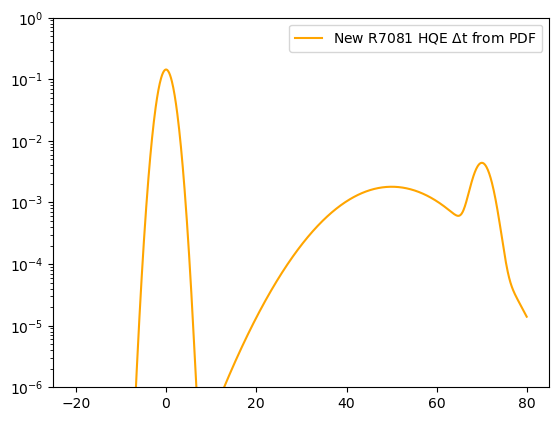

In [62]:
time_r7081_old=[-20.0 , -19.9 , -19.8 , -19.7 , -19.6 , -19.5 , -19.4 , -19.3 , -19.2 , -19.1 , -19.0 , -18.9 , -18.8 , -18.7 , -18.6 , -18.5 , -18.4 , -18.3 , -18.2 , -18.1 , -18.0 , -17.9 , -17.8 , -17.7 , -17.6 , -17.5 , -17.4 , -17.3 , -17.2 , -17.1 , -17.0 , -16.9 , -16.8 , -16.7 , -16.6 , -16.5 , -16.4 , -16.3 , -16.2 , -16.1 , -16.0 , -15.9 , -15.8 , -15.7 , -15.6 , -15.5 , -15.4 , -15.3 , -15.2 , -15.1 , -15.0 , -14.9 , -14.8 , -14.7 , -14.6 , -14.5 , -14.4 , -14.3 , -14.2 , -14.1 , -14.0 , -13.9 , -13.8 , -13.7 , -13.6 , -13.5 , -13.4 , -13.3 , -13.2 , -13.1 , -13.0 , -12.9 , -12.8 , -12.7 , -12.6 , -12.5 , -12.4 , -12.3 , -12.2 , -12.1 , -12.0 , -11.9 , -11.8 , -11.7 , -11.6 , -11.5 , -11.4 , -11.3 , -11.2 , -11.1 , -11.0 , -10.9 , -10.8 , -10.7 , -10.6 , -10.5 , -10.4 , -10.3 , -10.2 , -10.1 , -10.0 , -9.9 , -9.8 , -9.7 , -9.6 , -9.5 , -9.4 , -9.3 , -9.2 , -9.1 , -9.0 , -8.9 , -8.8 , -8.7 , -8.6 , -8.5 , -8.4 , -8.3 , -8.2 , -8.1 , -8.0 , -7.9 , -7.8 , -7.7 , -7.6 , -7.5 , -7.4 , -7.3 , -7.2 , -7.1 , -7.0 , -6.9 , -6.8 , -6.7 , -6.6 , -6.5 , -6.4 , -6.3 , -6.2 , -6.1 , -6.0 , -5.9 , -5.8 , -5.7 , -5.6 , -5.5 , -5.4 , -5.3 , -5.2 , -5.1 , -5.0 , -4.9 , -4.8 , -4.7 , -4.6 , -4.5 , -4.4 , -4.3 , -4.2 , -4.1 , -4.0 , -3.9 , -3.8 , -3.7 , -3.6 , -3.5 , -3.4 , -3.3 , -3.2 , -3.1 , -3.0 , -2.9 , -2.8 , -2.7 , -2.6 , -2.5 , -2.4 , -2.3 , -2.2 , -2.1 , -2.0 , -1.9 , -1.8 , -1.7 , -1.6 , -1.5 , -1.4 , -1.3 , -1.2 , -1.1 , -1.0 , -0.9 , -0.8 , -0.7 , -0.6 , -0.5 , -0.4 , -0.3 , -0.2 , -0.1 , 0.0 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.0 , 1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.0 , 2.1 , 2.2 , 2.3 , 2.4 , 2.5 , 2.6 , 2.7 , 2.8 , 2.9 , 3.0 , 3.1 , 3.2 , 3.3 , 3.4 , 3.5 , 3.6 , 3.7 , 3.8 , 3.9 , 4.0 , 4.1 , 4.2 , 4.3 , 4.4 , 4.5 , 4.6 , 4.7 , 4.8 , 4.9 , 5.0 , 5.1 , 5.2 , 5.3 , 5.4 , 5.5 , 5.6 , 5.7 , 5.8 , 5.9 , 6.0 , 6.1 , 6.2 , 6.3 , 6.4 , 6.5 , 6.6 , 6.7 , 6.8 , 6.9 , 7.0 , 7.1 , 7.2 , 7.3 , 7.4 , 7.5 , 7.6 , 7.7 , 7.8 , 7.9 , 8.0 , 8.1 , 8.2 , 8.3 , 8.4 , 8.5 , 8.6 , 8.7 , 8.8 , 8.9 , 9.0 , 9.1 , 9.2 , 9.3 , 9.4 , 9.5 , 9.6 , 9.7 , 9.8 , 9.9 , 10.0 , 10.1 , 10.2 , 10.3 , 10.4 , 10.5 , 10.6 , 10.7 , 10.8 , 10.9 , 11.0 , 11.1 , 11.2 , 11.3 , 11.4 , 11.5 , 11.6 , 11.7 , 11.8 , 11.9 , 12.0 , 12.1 , 12.2 , 12.3 , 12.4 , 12.5 , 12.6 , 12.7 , 12.8 , 12.9 , 13.0 , 13.1 , 13.2 , 13.3 , 13.4 , 13.5 , 13.6 , 13.7 , 13.8 , 13.9 , 14.0 , 14.1 , 14.2 , 14.3 , 14.4 , 14.5 , 14.6 , 14.7 , 14.8 , 14.9 , 15.0 , 15.1 , 15.2 , 15.3 , 15.4 , 15.5 , 15.6 , 15.7 , 15.8 , 15.9 , 16.0 , 16.1 , 16.2 , 16.3 , 16.4 , 16.5 , 16.6 , 16.7 , 16.8 , 16.9 , 17.0 , 17.1 , 17.2 , 17.3 , 17.4 , 17.5 , 17.6 , 17.7 , 17.8 , 17.9 , 18.0 , 18.1 , 18.2 , 18.3 , 18.4 , 18.5 , 18.6 , 18.7 , 18.8 , 18.9 , 19.0 , 19.1 , 19.2 , 19.3 , 19.4 , 19.5 , 19.6 , 19.7 , 19.8 , 19.9 , 20.0 , 20.1 , 20.2 , 20.3 , 20.4 , 20.5 , 20.6 , 20.7 , 20.8 , 20.9 , 21.0 , 21.1 , 21.2 , 21.3 , 21.4 , 21.5 , 21.6 , 21.7 , 21.8 , 21.9 , 22.0 , 22.1 , 22.2 , 22.3 , 22.4 , 22.5 , 22.6 , 22.7 , 22.8 , 22.9 , 23.0 , 23.1 , 23.2 , 23.3 , 23.4 , 23.5 , 23.6 , 23.7 , 23.8 , 23.9 , 24.0 , 24.1 , 24.2 , 24.3 , 24.4 , 24.5 , 24.6 , 24.7 , 24.8 , 24.9 , 25.0 , 25.1 , 25.2 , 25.3 , 25.4 , 25.5 , 25.6 , 25.7 , 25.8 , 25.9 , 26.0 , 26.1 , 26.2 , 26.3 , 26.4 , 26.5 , 26.6 , 26.7 , 26.8 , 26.9 , 27.0 , 27.1 , 27.2 , 27.3 , 27.4 , 27.5 , 27.6 , 27.7 , 27.8 , 27.9 , 28.0 , 28.1 , 28.2 , 28.3 , 28.4 , 28.5 , 28.6 , 28.7 , 28.8 , 28.9 , 29.0 , 29.1 , 29.2 , 29.3 , 29.4 , 29.5 , 29.6 , 29.7 , 29.8 , 29.9 , 30.0 , 30.1 , 30.2 , 30.3 , 30.4 , 30.5 , 30.6 , 30.7 , 30.8 , 30.9 , 31.0 , 31.1 , 31.2 , 31.3 , 31.4 , 31.5 , 31.6 , 31.7 , 31.8 , 31.9 , 32.0 , 32.1 , 32.2 , 32.3 , 32.4 , 32.5 , 32.6 , 32.7 , 32.8 , 32.9 , 33.0 , 33.1 , 33.2 , 33.3 , 33.4 , 33.5 , 33.6 , 33.7 , 33.8 , 33.9 , 34.0 , 34.1 , 34.2 , 34.3 , 34.4 , 34.5 , 34.6 , 34.7 , 34.8 , 34.9 , 35.0 , 35.1 , 35.2 , 35.3 , 35.4 , 35.5 , 35.6 , 35.7 , 35.8 , 35.9 , 36.0 , 36.1 , 36.2 , 36.3 , 36.4 , 36.5 , 36.6 , 36.7 , 36.8 , 36.9 , 37.0 , 37.1 , 37.2 , 37.3 , 37.4 , 37.5 , 37.6 , 37.7 , 37.8 , 37.9 , 38.0 , 38.1 , 38.2 , 38.3 , 38.4 , 38.5 , 38.6 , 38.7 , 38.8 , 38.9 , 39.0 , 39.1 , 39.2 , 39.3 , 39.4 , 39.5 , 39.6 , 39.7 , 39.8 , 39.9 , 40.0 , 40.1 , 40.2 , 40.3 , 40.4 , 40.5 , 40.6 , 40.7 , 40.8 , 40.9 , 41.0 , 41.1 , 41.2 , 41.3 , 41.4 , 41.5 , 41.6 , 41.7 , 41.8 , 41.9 , 42.0 , 42.1 , 42.2 , 42.3 , 42.4 , 42.5 , 42.6 , 42.7 , 42.8 , 42.9 , 43.0 , 43.1 , 43.2 , 43.3 , 43.4 , 43.5 , 43.6 , 43.7 , 43.8 , 43.9 , 44.0 , 44.1 , 44.2 , 44.3 , 44.4 , 44.5 , 44.6 , 44.7 , 44.8 , 44.9 , 45.0 , 45.1 , 45.2 , 45.3 , 45.4 , 45.5 , 45.6 , 45.7 , 45.8 , 45.9 , 46.0 , 46.1 , 46.2 , 46.3 , 46.4 , 46.5 , 46.6 , 46.7 , 46.8 , 46.9 , 47.0 , 47.1 , 47.2 , 47.3 , 47.4 , 47.5 , 47.6 , 47.7 , 47.8 , 47.9 , 48.0 , 48.1 , 48.2 , 48.3 , 48.4 , 48.5 , 48.6 , 48.7 , 48.8 , 48.9 , 49.0 , 49.1 , 49.2 , 49.3 , 49.4 , 49.5 , 49.6 , 49.7 , 49.8 , 49.9 , 50.0 , 50.1 , 50.2 , 50.3 , 50.4 , 50.5 , 50.6 , 50.7 , 50.8 , 50.9 , 51.0 , 51.1 , 51.2 , 51.3 , 51.4 , 51.5 , 51.6 , 51.7 , 51.8 , 51.9 , 52.0 , 52.1 , 52.2 , 52.3 , 52.4 , 52.5 , 52.6 , 52.7 , 52.8 , 52.9 , 53.0 , 53.1 , 53.2 , 53.3 , 53.4 , 53.5 , 53.6 , 53.7 , 53.8 , 53.9 , 54.0 , 54.1 , 54.2 , 54.3 , 54.4 , 54.5 , 54.6 , 54.7 , 54.8 , 54.9 , 55.0 , 55.1 , 55.2 , 55.3 , 55.4 , 55.5 , 55.6 , 55.7 , 55.8 , 55.9 , 56.0 , 56.1 , 56.2 , 56.3 , 56.4 , 56.5 , 56.6 , 56.7 , 56.8 , 56.9 , 57.0 , 57.1 , 57.2 , 57.3 , 57.4 , 57.5 , 57.6 , 57.7 , 57.8 , 57.9 , 58.0 , 58.1 , 58.2 , 58.3 , 58.4 , 58.5 , 58.6 , 58.7 , 58.8 , 58.9 , 59.0 , 59.1 , 59.2 , 59.3 , 59.4 , 59.5 , 59.6 , 59.7 , 59.8 , 59.9 , 60.0 , 60.1 , 60.2 , 60.3 , 60.4 , 60.5 , 60.6 , 60.7 , 60.8 , 60.9 , 61.0 , 61.1 , 61.2 , 61.3 , 61.4 , 61.5 , 61.6 , 61.7 , 61.8 , 61.9 , 62.0 , 62.1 , 62.2 , 62.3 , 62.4 , 62.5 , 62.6 , 62.7 , 62.8 , 62.9 , 63.0 , 63.1 , 63.2 , 63.3 , 63.4 , 63.5 , 63.6 , 63.7 , 63.8 , 63.9 , 64.0 , 64.1 , 64.2 , 64.3 , 64.4 , 64.5 , 64.6 , 64.7 , 64.8 , 64.9 , 65.0 , 65.1 , 65.2 , 65.3 , 65.4 , 65.5 , 65.6 , 65.7 , 65.8 , 65.9 , 66.0 , 66.1 , 66.2 , 66.3 , 66.4 , 66.5 , 66.6 , 66.7 , 66.8 , 66.9 , 67.0 , 67.1 , 67.2 , 67.3 , 67.4 , 67.5 , 67.6 , 67.7 , 67.8 , 67.9 , 68.0 , 68.1 , 68.2 , 68.3 , 68.4 , 68.5 , 68.6 , 68.7 , 68.8 , 68.9 , 69.0 , 69.1 , 69.2 , 69.3 , 69.4 , 69.5 , 69.6 , 69.7 , 69.8 , 69.9 , 70.0 , 70.1 , 70.2 , 70.3 , 70.4 , 70.5 , 70.6 , 70.7 , 70.8 , 70.9 , 71.0 , 71.1 , 71.2 , 71.3 , 71.4 , 71.5 , 71.6 , 71.7 , 71.8 , 71.9 , 72.0 , 72.1 , 72.2 , 72.3 , 72.4 , 72.5 , 72.6 , 72.7 , 72.8 , 72.9 , 73.0 , 73.1 , 73.2 , 73.3 , 73.4 , 73.5 , 73.6 , 73.7 , 73.8 , 73.9 , 74.0 , 74.1 , 74.2 , 74.3 , 74.4 , 74.5 , 74.6 , 74.7 , 74.8 , 74.9 , 75.0 , 75.1 , 75.2 , 75.3 , 75.4 , 75.5 , 75.6 , 75.7 , 75.8 , 75.9 , 76.0 , 76.1 , 76.2 , 76.3 , 76.4 , 76.5 , 76.6 , 76.7 , 76.8 , 76.9 , 77.0 , 77.1 , 77.2 , 77.3 , 77.4 , 77.5 , 77.6 , 77.7 , 77.8 , 77.9 , 78.0 , 78.1 , 78.2 , 78.3 , 78.4 , 78.5 , 78.6 , 78.7 , 78.8 , 78.9 , 79.0 , 79.1 , 79.2 , 79.3 , 79.4 , 79.5 , 79.6 , 79.7 , 79.8 , 79.9]
prob_r7081_old=[ 4.93629671886e-15 , 5.32612775326e-15 , 5.74612024813e-15 , 6.19855772134e-15 , 6.68589263156e-15 , 7.21075857257e-15 , 7.77598332464e-15 , 8.38460282169e-15 , 9.0398760965e-15 , 9.74530127072e-15 , 1.05046326604e-14 , 1.13218990728e-14 , 1.2201423375e-14 , 1.31478434201e-14 , 1.41661344225e-14 , 1.52616328797e-14 , 1.64400621445e-14 , 1.77075597577e-14 , 1.90707066591e-14 , 2.05365584029e-14 , 2.21126785094e-14 , 2.38071740956e-14 , 2.56287339366e-14 , 2.7586669117e-14 , 2.96909564441e-14 , 3.19522848056e-14 , 3.43821046631e-14 , 3.69926808899e-14 , 3.979714917e-14 , 4.28095761919e-14 , 4.6045023884e-14 , 4.95196179556e-14 , 5.32506210214e-14 , 5.72565106085e-14 , 6.15570623591e-14 , 6.61734387668e-14 , 7.11282838003e-14 , 7.64458237945e-14 , 8.21519750098e-14 , 8.82744582863e-14 , 9.48429212461e-14 , 1.01889068525e-13 , 1.0944680054e-13 , 1.17552361343e-13 , 1.26244496125e-13 , 1.35564618987e-13 , 1.45556991619e-13 , 1.56268913588e-13 , 1.67750924934e-13 , 1.80057021878e-13 , 1.9324488644e-13 , 2.07376130833e-13 , 2.22516557571e-13 , 2.38736436239e-13 , 2.56110797984e-13 , 2.74719748796e-13 , 2.94648802761e-13 , 3.15989236494e-13 , 3.38838466063e-13 , 3.63300447783e-13 , 3.89486104326e-13 , 4.17513777702e-13 , 4.47509710739e-13 , 4.79608558793e-13 , 5.13953933516e-13 , 5.50698980627e-13 , 5.90006993718e-13 , 6.32052066295e-13 , 6.7701978432e-13 , 7.25107961718e-13 , 7.7652742143e-13 , 8.31502824781e-13 , 8.90273552119e-13 , 9.53094637985e-13 , 1.02023776435e-12 , 1.09199231605e-12 , 1.16866650327e-12 , 1.25058855732e-12 , 1.33810800815e-12 , 1.43159705604e-12 , 1.53145205668e-12 , 1.63809515137e-12 , 1.75197609543e-12 , 1.87357437608e-12 , 2.00340177823e-12 , 2.14200567318e-12 , 2.2899735086e-12 , 2.44793932912e-12 , 2.61659375956e-12 , 2.79669991188e-12 , 2.98911942315e-12 , 3.19485577657e-12 , 3.41512699331e-12 , 3.65148800378e-12 , 3.90603661558e-12 , 4.1817593792e-12 , 4.483110241e-12 , 4.81697429981e-12 , 5.19426489188e-12 , 5.63255602565e-12 , 6.16039722816e-12 , 6.82434576285e-12 , 7.70036122894e-12 , 8.91216072039e-12 , 1.06606122001e-11 , 1.32705249533e-11 , 1.72646899532e-11 , 2.3480338537e-11 , 3.32512199881e-11 , 4.86905531234e-11 , 7.31280737521e-11 , 1.11780992951e-10 , 1.7277776671e-10 , 2.68710618104e-10 , 4.18975401939e-10 , 6.53276290266e-10 , 1.01684252439e-09 , 1.57814510299e-09 , 2.4402397681e-09 , 3.75733518735e-09 , 5.75883978294e-09 , 8.78404019409e-09 , 1.33317906475e-08 , 2.01312505548e-08 , 3.02419307123e-08 , 4.51942635487e-08 , 6.71858064634e-08 , 9.93532710884e-08 , 1.46147147206e-07 , 2.13844113846e-07 , 3.1124311283e-07 , 4.50604365663e-07 , 6.48907252611e-07 , 9.29523383092e-07 , 1.32442591639e-06 , 1.87708575976e-06 , 2.64624011835e-06 , 3.71075929708e-06 , 5.17588373063e-06 , 7.18115469268e-06 , 9.9104183083e-06 , 1.36043420866e-05 , 1.85759441979e-05 , 2.52296952574e-05 , 3.40848065481e-05 , 4.58033623737e-05 , 6.12239813087e-05 , 8.1401694008e-05 , 0.00010765469523 , 0.00014161855513 , 0.000185308349252 , 0.000241188977309 , 0.000312253677574 , 0.00040211039729 , 0.000515075243216 , 0.000656271706546 , 0.000831733734043 , 0.00104851000914 , 0.00131476602695 , 0.00163987971776 , 0.00203452552574 , 0.00251074102398 , 0.003081969393 , 0.00376307046595 , 0.00457029261449 , 0.00552119758283 , 0.00663453054418 , 0.00793002821809 , 0.00942815890615 , 0.0111497898197 , 0.0131157791082 , 0.0153464925483 , 0.017861247885 , 0.020677693266 , 0.0238111299635 , 0.027273793507 , 0.0310741112728 , 0.0352159582939 , 0.0396979363453 , 0.0445127039928 , 0.0496463870452 , 0.055078099503 , 0.0607796044873 , 0.0667151426254 , 0.0728414519059 , 0.0791079981062 , 0.0854574286284 , 0.0918262551367 , 0.0981457620242 , 0.104343128791 , 0.110342745271 , 0.116067689748 , 0.121441331809 , 0.12638901473 , 0.130839766691 , 0.134727986567 , 0.137995048627 , 0.140590771428 , 0.142474699549 , 0.143617152422 , 0.144000002272 , 0.143617152669 , 0.142474700044 , 0.140590772172 , 0.137995049621 , 0.134727987815 , 0.130839768196 , 0.126389016495 , 0.12144133384 , 0.116067692049 , 0.110342747849 , 0.104343131652 , 0.0981457651761 , 0.0918262585875 , 0.0854574323871 , 0.0791080021825 , 0.0728414563104 , 0.0667151473694 , 0.0607796095831 , 0.0550781049636 , 0.0496463928845 , 0.0445127102258 , 0.0396979429878 , 0.0352159653628 , 0.0310741187859 , 0.0272738014833 , 0.0238111384231 , 0.0206777022301 , 0.0178612573758 , 0.0153465025896 , 0.0131157897249 , 0.011149801038 , 0.00942817075371 , 0.00793004072396 , 0.00663454373894 , 0.00552121149861 , 0.00457030728505 , 0.00376308592674 , 0.00308198568123 , 0.0025107581787 , 0.00203454358791 , 0.00163989873032 , 0.00131478603493 , 0.00104853105972 , 0.000831755876646 , 0.000656294992946 , 0.000515099727625 , 0.000402136136464 , 0.000312280730917 , 0.000241217406984 , 0.000185338220297 , 0.000141649935578 , 0.000107687656229 , 8.14363099558e-05 , 6.1260329986e-05 , 4.58415250829e-05 , 3.41248682597e-05 , 2.52717447607e-05 , 1.86200742587e-05 , 1.36506496096e-05 , 9.95900450699e-06 , 7.23212526535e-06 , 5.22934904288e-06 , 3.76683457152e-06 , 2.70504563143e-06 , 1.93874704594e-06 , 1.38907398009e-06 , 9.97294918396e-07 , 7.19944871266e-07 , 5.25056833419e-07 , 3.89265594505e-07 , 2.95598427362e-07 , 2.31802026882e-07 , 1.89084640487e-07 , 1.61177061093e-07 , 1.43636563729e-07 , 1.33334504919e-07 , 1.28081709577e-07 , 1.26356452878e-07 , 1.27108268408e-07 , 1.29617389749e-07 , 1.33394716469e-07 , 1.38111089094e-07 , 1.43547612669e-07 , 1.49560991625e-07 , 1.56059496671e-07 , 1.62986410737e-07 , 1.70308700526e-07 , 1.78009314794e-07 , 1.86081982993e-07 , 1.94527726424e-07 , 2.03352534668e-07 , 2.12565829819e-07 , 2.22179459945e-07 , 2.32207045835e-07 , 2.42663562164e-07 , 2.53565073245e-07 , 2.6492857017e-07 , 2.76771874105e-07 , 2.89113582519e-07 , 3.01973043226e-07 , 3.15370346368e-07 , 3.29326328002e-07 , 3.43862581236e-07 , 3.59001472298e-07 , 3.74766159928e-07 , 3.91180617068e-07 , 4.0826965419e-07 , 4.260589439e-07 , 4.44575046562e-07 , 4.63845436806e-07 , 4.83898530834e-07 , 5.04763714492e-07 , 5.26471372054e-07 , 5.49052915749e-07 , 5.72540815991e-07 , 5.96968632342e-07 , 6.22371045197e-07 , 6.48783888207e-07 , 6.76244181444e-07 , 7.04790165324e-07 , 7.34461335282e-07 , 7.65298477226e-07 , 7.97343703764e-07 , 8.30640491221e-07 , 8.65233717453e-07 , 9.0116970046e-07 , 9.38496237816e-07 , 9.77262646917e-07 , 1.01751980605e-06 , 1.05932019631e-06 , 1.10271794435e-06 , 1.14776886594e-06 , 1.19453051046e-06 , 1.24306220618e-06 , 1.29342510643e-06 , 1.34568223662e-06 , 1.39989854216e-06 , 1.45614093722e-06 , 1.51447835441e-06 , 1.57498179527e-06 , 1.63772438173e-06 , 1.70278140836e-06 , 1.77023039559e-06 , 1.84015114374e-06 , 1.91262578796e-06 , 1.9877388541e-06 , 2.06557731532e-06 , 2.14623064976e-06 , 2.22979089891e-06 , 2.31635272695e-06 , 2.40601348092e-06 , 2.49887325173e-06 , 2.59503493602e-06 , 2.69460429891e-06 , 2.79769003748e-06 , 2.90440384516e-06 , 3.01486047684e-06 , 3.12917781491e-06 , 3.24747693588e-06 , 3.369882178e-06 , 3.4965212094e-06 , 3.62752509714e-06 , 3.76302837689e-06 , 3.90316912333e-06 , 4.0480890212e-06 , 4.19793343705e-06 , 4.35285149155e-06 , 4.51299613251e-06 , 4.67852420834e-06 , 4.84959654221e-06 , 5.0263780066e-06 , 5.20903759845e-06 , 5.39774851469e-06 , 5.59268822823e-06 , 5.79403856438e-06 , 6.00198577756e-06 , 6.21672062833e-06 , 6.43843846079e-06 , 6.66733928008e-06 , 6.90362783019e-06 , 7.14751367188e-06 , 7.39921126065e-06 , 7.65894002483e-06 , 7.92692444369e-06 , 8.20339412543e-06 , 8.48858388509e-06 , 8.78273382237e-06 , 9.08608939918e-06 , 9.39890151688e-06 , 9.7214265933e-06 , 1.00539266393e-05 , 1.03966693347e-05 , 1.07499281041e-05 , 1.11139821919e-05 , 1.14891167362e-05 , 1.18756228429e-05 , 1.22737976582e-05 , 1.26839444403e-05 , 1.3106372631e-05 , 1.35413979247e-05 , 1.3989342338e-05 , 1.44505342767e-05 , 1.49253086023e-05 , 1.54140066968e-05 , 1.59169765263e-05 , 1.64345727028e-05 , 1.69671565442e-05 , 1.75150961332e-05 , 1.80787663737e-05 , 1.86585490454e-05 , 1.9254832857e-05 , 1.98680134962e-05 , 2.04984936782e-05 , 2.1146683192e-05 , 2.18129989434e-05 , 2.24978649965e-05 , 2.32017126118e-05 , 2.39249802817e-05 , 2.46681137636e-05 , 2.5431566109e-05 , 2.62157976908e-05 , 2.70212762261e-05 , 2.78484767967e-05 , 2.86978818656e-05 , 2.956998129e-05 , 3.04652723308e-05 , 3.13842596582e-05 , 3.23274553532e-05 , 3.32953789055e-05 , 3.42885572068e-05 , 3.53075245401e-05 , 3.63528225647e-05 , 3.7425000296e-05 , 3.85246140816e-05 , 3.96522275721e-05 , 4.08084116871e-05 , 4.1993744576e-05 , 4.32088115742e-05 , 4.44542051538e-05 , 4.57305248683e-05 , 4.70383772932e-05 , 4.83783759595e-05 , 4.97511412826e-05 , 5.11573004849e-05 , 5.25974875122e-05 , 5.40723429448e-05 , 5.55825139014e-05 , 5.7128653938e-05 , 5.87114229387e-05 , 6.03314870021e-05 , 6.19895183189e-05 , 6.36861950447e-05 , 6.54222011645e-05 , 6.71982263515e-05 , 6.90149658179e-05 , 7.08731201591e-05 , 7.2773395191e-05 , 7.47165017792e-05 , 7.67031556617e-05 , 7.87340772635e-05 , 8.08099915041e-05 , 8.29316275975e-05 , 8.50997188438e-05 , 8.73150024142e-05 , 8.95782191272e-05 , 9.18901132177e-05 , 9.42514320977e-05 , 9.66629261095e-05 , 9.91253482704e-05 , 0.00010163945401 , 0.0001042060009 , 0.000106825748372 , 0.000109499457434 , 0.000112227890374 , 0.000115011810455 , 0.000117851981606 , 0.000120749168099 , 0.000123704134225 , 0.000126717643956 , 0.000129790460602 , 0.000132923346459 , 0.000136117062446 , 0.000139372367744 , 0.000142690019414 , 0.000146070772016 , 0.000149515377218 , 0.000153024583394 , 0.000156599135221 , 0.000160239773265 , 0.000163947233554 , 0.000167722247155 , 0.000171565539736 , 0.000175477831119 , 0.000179459834835 , 0.000183512257664 , 0.000187635799172 , 0.000191831151241 , 0.00019609899759 , 0.000200440013295 , 0.000204854864298 , 0.000209344206914 , 0.00021390868733 , 0.000218548941095 , 0.000223265592618 , 0.000228059254643 , 0.000232930527732 , 0.00023787999974 , 0.000242908245286 , 0.000248015825215 , 0.000253203286067 , 0.000258471159531 , 0.000263819961902 , 0.000269250193536 , 0.000274762338301 , 0.000280356863019 , 0.000286034216921 , 0.000291794831084 , 0.000297639117879 , 0.000303567470411 , 0.000309580261961 , 0.000315677845428 , 0.000321860552769 , 0.000328128694442 , 0.00033448255885 , 0.00034092241178 , 0.000347448495856 , 0.000354061029978 , 0.00036076020878 , 0.000367546202077 , 0.000374419154324 , 0.000381379184072 , 0.000388426383439 , 0.000395560817569 , 0.000402782524111 , 0.000410091512697 , 0.000417487764424 , 0.000424971231346 , 0.000432541835971 , 0.000440199470766 , 0.000447943997667 , 0.000455775247603 , 0.000463693020018 , 0.000471697082417 , 0.000479787169905 , 0.00048796298475 , 0.000496224195946 , 0.000504570438795 , 0.000513001314493 , 0.000521516389733 , 0.000530115196317 , 0.000538797230784 , 0.000547561954048 , 0.000556408791052 , 0.000565337130432 , 0.000574346324201 , 0.000583435687444 , 0.000592604498031 , 0.000601851996342 , 0.000611177385012 , 0.000620579828691 , 0.000630058453824 , 0.000639612348439 , 0.000649240561967 , 0.000658942105069 , 0.000668715949487 , 0.000678561027911 , 0.000688476233869 , 0.000698460421636 , 0.000708512406157 , 0.000718630963001 , 0.000728814828327 , 0.000739062698875 , 0.000749373231978 , 0.000759745045598 , 0.000770176718377 , 0.000780666789718 , 0.000791213759883 , 0.00080181609012 , 0.000812472202805 , 0.000823180481615 , 0.000833939271717 , 0.000844746879988 , 0.000855601575253 , 0.00086650158855 , 0.000877445113418 , 0.000888430306209 , 0.000899455286426 , 0.000910518137083 , 0.000921616905089 , 0.000932749601662 , 0.00094391420276 , 0.000955108649542 , 0.000966330848851 , 0.00097757867372 , 0.00098884996391 , 0.00100014252646 , 0.00101145413628 , 0.00102278253673 , 0.0010341254403 , 0.00104548052919 , 0.00105684545608 , 0.00106821784472 , 0.00107959529078 , 0.00109097536248 , 0.00110235560144 , 0.00111373352345 , 0.00112510661926 , 0.00113647235546 , 0.00114782817532 , 0.00115917149967 , 0.00117049972778 , 0.00118181023835 , 0.00119310039038 , 0.00120436752417 , 0.0012156089623 , 0.00122682201062 , 0.0012380039593 , 0.00124915208383 , 0.00126026364608 , 0.00127133589542 , 0.00128236606973 , 0.0012933513966 , 0.00130428909437 , 0.00131517637329 , 0.0013260104367 , 0.00133678848215 , 0.00134750770258 , 0.00135816528756 , 0.00136875842442 , 0.00137928429948 , 0.00138974009932 , 0.00140012301192 , 0.00141043022798 , 0.00142065894211 , 0.00143080635413 , 0.00144086967028 , 0.00145084610451 , 0.00146073287976 , 0.0014705272292 , 0.00148022639755 , 0.00148982764233 , 0.00149932823512 , 0.0015087254629 , 0.00151801662929 , 0.00152719905583 , 0.00153627008326 , 0.00154522707281 , 0.00155406740747 , 0.00156278849323 , 0.00157138776039 , 0.00157986266477 , 0.00158821068897 , 0.00159642934365 , 0.0016045161687 , 0.00161246873452 , 0.0016202846432 , 0.00162796152972 , 0.00163549706318 , 0.00164288894792 , 0.00165013492471 , 0.00165723277193 , 0.00166418030663 , 0.00167097538574 , 0.00167761590707 , 0.00168409981048 , 0.00169042507889 , 0.00169658973936 , 0.00170259186407 , 0.00170842957137 , 0.00171410102674 , 0.00171960444375 , 0.00172493808501 , 0.00173010026306 , 0.00173508934129 , 0.00173990373479 , 0.00174454191117 , 0.0017490023914 , 0.00175328375059 , 0.00175738461874 , 0.00176130368147 , 0.00176503968075 , 0.00176859141553 , 0.0017719577424 , 0.00177513757623 , 0.0017781298907 , 0.0017809337189 , 0.00178354815384 , 0.00178597234891 , 0.00178820551838 , 0.0017902469378 , 0.00179209594438 , 0.00179375193737 , 0.00179521437838 , 0.00179648279169 , 0.00179755676445 , 0.00179843594697 , 0.00179912005288 , 0.00179960885927 , 0.00179990220685 , 0.0018 , 0.00179990220685 , 0.00179960885927 , 0.00179912005288 , 0.00179843594697 , 0.00179755676445 , 0.00179648279169 , 0.00179521437838 , 0.00179375193737 , 0.00179209594438 , 0.0017902469378 , 0.00178820551838 , 0.00178597234891 , 0.00178354815384 , 0.0017809337189 , 0.0017781298907 , 0.00177513757623 , 0.0017719577424 , 0.00176859141553 , 0.00176503968075 , 0.00176130368147 , 0.00175738461874 , 0.00175328375059 , 0.0017490023914 , 0.00174454191117 , 0.00173990373479 , 0.00173508934129 , 0.00173010026306 , 0.00172493808501 , 0.00171960444375 , 0.00171410102674 , 0.00170842957137 , 0.00170259186407 , 0.00169658973936 , 0.00169042507889 , 0.00168409981048 , 0.00167761590707 , 0.00167097538574 , 0.00166418030663 , 0.00165723277193 , 0.00165013492471 , 0.00164288894792 , 0.00163549706318 , 0.00162796152972 , 0.0016202846432 , 0.00161246873452 , 0.0016045161687 , 0.00159642934365 , 0.00158821068897 , 0.00157986266477 , 0.00157138776039 , 0.00156278849323 , 0.00155406740747 , 0.00154522707281 , 0.00153627008326 , 0.00152719905583 , 0.00151801662929 , 0.0015087254629 , 0.00149932823512 , 0.00148982764233 , 0.00148022639755 , 0.0014705272292 , 0.00146073287976 , 0.00145084610451 , 0.00144086967028 , 0.00143080635413 , 0.00142065894211 , 0.00141043022798 , 0.00140012301192 , 0.00138974009932 , 0.00137928429949 , 0.00136875842443 , 0.00135816528759 , 0.00134750770262 , 0.0013367884822 , 0.00132601043679 , 0.00131517637342 , 0.00130428909456 , 0.00129335139688 , 0.00128236607014 , 0.00127133589601 , 0.00126026364694 , 0.00124915208508 , 0.00123800396111 , 0.00122682201324 , 0.00121560896606 , 0.00120436752956 , 0.0011931003981 , 0.00118181024935 , 0.00117049974341 , 0.00115917152181 , 0.00114782820659 , 0.00113647239947 , 0.00112510668101 , 0.00111373360981 , 0.00110235572186 , 0.00109097552984 , 0.00107959552266 , 0.00106821816499 , 0.00105684589703 , 0.0010454811344 , 0.00103412626833 , 0.00102278366607 , 0.0010114556717 , 0.00100014460744 , 0.000988852775399 , 0.000977582460219 , 0.000966335932445 , 0.000955115453095 , 0.000943923279552 , 0.000932761673147 , 0.000921632908802 , 0.000910539287189 , 0.000899483149952 , 0.000888466898645 , 0.000877493018137 , 0.000866564105389 , 0.000855682904632 , 0.000844852350154 , 0.000834075618073 , 0.000823356188659 , 0.000812697920986 , 0.000802105141895 , 0.000791582751477 , 0.000781136347491 , 0.000770772371369 , 0.000760498278622 , 0.000750322736655 , 0.000740255853132 , 0.000730309438085 , 0.000720497302996 , 0.000710835599976 , 0.000701343203993 , 0.000692042140755 , 0.000682958062407 , 0.000674120772516 , 0.000665564800992 , 0.000657330028509 , 0.000649462358685 , 0.000642014434726 , 0.000635046395408 , 0.000628626663222 , 0.000622832755144 , 0.000617752103967 , 0.000613482875339 , 0.000610134762744 , 0.000607829739647 , 0.000606702744956 , 0.000606902274969 , 0.000608590852179 , 0.000611945338722 , 0.000617157060184 , 0.000624431703861 , 0.000633988954746 , 0.000646061832462 , 0.000660895693367 , 0.000678746864138 , 0.000699880876523 , 0.000724570277657 , 0.000753091996437 , 0.00078572425405 , 0.000822743015725 , 0.000864417991148 , 0.000911008202576 , 0.00096275715238 , 0.00101988763522 , 0.00108259625411 , 0.00115104771384 , 0.00122536897914 , 0.00130564339845 , 0.00139190490611 , 0.00148413242653 , 0.00158224461208 , 0.00168609505249 , 0.00179546809614 , 0.0019100754229 , 0.00202955350409 , 0.00215346207637 , 0.00228128374429 , 0.00241242480976 , 0.0025462174063 , 0.00268192299201 , 0.00281873722856 , 0.00295579624324 , 0.00309218424015 , 0.00322694239362 , 0.00335907892423 , 0.00348758022566 , 0.00361142287994 , 0.00372958637108 , 0.00384106628275 , 0.00394488774567 , 0.00404011888617 , 0.00412588401821 , 0.00420137631892 , 0.00426586973154 , 0.00431872985062 , 0.00435942356107 , 0.00438752722625 , 0.00440273324917 , 0.0044048548643 , 0.00439382905555 , 0.00436971753651 , 0.00433270577121 , 0.00428310005718 , 0.00422132273456 , 0.00414790562602 , 0.00406348184959 , 0.00396877618062 , 0.00386459416761 , 0.00375181023023 , 0.00363135498481 , 0.00350420205326 , 0.00337135461552 , 0.00323383196315 , 0.00309265630261 , 0.00294884004264 , 0.0028033737799 , 0.00265721517312 , 0.00251127886805 , 0.00236642760494 , 0.00222346460829 , 0.00208312732574 , 0.00194608255002 , 0.00181292292685 , 0.00168416482157 , 0.00156024749065 , 0.00144153347995 , 0.00132831015167 , 0.00122079222535 , 0.0011191252058 , 0.00102338956264 , 0.00093360552181 , 0.00084973832837 , 0.000771703843222 , 0.000699374341651 , 0.000632584390371 , 0.000571136690074 , 0.000514807782775 , 0.000463353536464 , 0.000416514333646 , 0.000374019904496 , 0.000335593759418 , 0.000300957189297 , 0.000269832814392 , 0.000241947674435 , 0.000217035862867 , 0.000194840717115 , 0.000175116584413 , 0.000157630188771 , 0.000142161629408 , 0.000128505044334 , 0.000116468974859 , 0.000105876467805 , 9.65649521602e-05 , 8.83859260549e-05 , 8.12044883794e-05 , 7.4898747219e-05 , 6.93591347618e-05 , 6.44876555033e-05 , 6.01970915851e-05 , 5.6410186056e-05 , 5.30588218206e-05 , 5.00832111178e-05 , 4.743110761e-05 , 4.50570506017e-05 , 4.29216485782e-05 , 4.09909071818e-05 , 3.92356049216e-05 , 3.76307183591e-05 , 3.61548972015e-05 , 3.47899886636e-05 , 3.35206096104e-05 , 3.23337643348e-05 , 3.12185053544e-05 , 3.01656342821e-05 , 2.91674396387e-05 , 2.82174683902e-05 , 2.73103280014e-05 , 2.64415158715e-05 , 2.56072731531e-05 , 2.48044601196e-05 , 2.40304504477e-05 , 2.32830419904e-05 , 2.25603818355e-05 , 2.18609036625e-05 , 2.11832756276e-05 , 2.05263572038e-05 , 1.98891636022e-05 , 1.92708365702e-05 , 1.86706205306e-05 , 1.80878431656e-05 , 1.75218996864e-05 , 1.69722401389e-05 , 1.64383592013e-05 , 1.59197880153e-05 , 1.54160876711e-05 , 1.49268440279e-05 , 1.44516636111e-05 , 1.39901703719e-05  ]

sum=0
for i in prob_r7081_old:
    sum+=i*0.1 #multiply by bin width
print('Sum of probability is',sum)

plt.plot(time_r7081_old,prob_r7081_old,label='New R7081 HQE $\Delta$t from PDF',color='orange')
plt.yscale('log')
plt.legend()
plt.ylim(1e-6,1)